<a href="https://colab.research.google.com/github/AhmedNasser1601/Stock-Analysis/blob/Main/Stock_Analysis_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Name: Mahmoud Mohamed Abdelhai***

> **Task1 >> *Stock Analysis***
---

|> ***Import Packages***

In [16]:
import sys
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
#import pandas_datareader as data
import seaborn as sns

from datetime import datetime

from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [15]:
pip install statsmodels

     ---------------------------------------- 9.4/9.4 MB 1.5 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv('C:/Users/FreeComp/Downloads/NFLX.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...
2021-09-24,592.500000,592.979980,583.640015,592.390015,592.390015,2124800
2021-09-27,587.950012,593.580017,576.929993,592.640015,592.640015,2504700
2021-09-28,589.000000,599.539978,580.159973,583.849976,583.849976,4431100


In [3]:
df.shape 

(4874, 6)

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4874.000000,4874.000000,4874.000000,4874.000000,4874.000000,4.874000e+03
mean,104.644811,106.243736,103.006660,104.686524,104.686524,1.681687e+07
std,155.886656,158.173217,153.546958,155.940368,155.940368,1.937625e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,3.901429,3.977143,3.835357,3.905714,3.905714,6.301225e+06
50%,21.386429,21.816429,20.935714,21.233572,21.233572,1.084630e+07
75%,125.445000,126.592499,122.987499,125.097502,125.097502,2.016192e+07
max,608.049988,619.000000,608.049988,610.340027,610.340027,3.234140e+08


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4874 entries, 2002-05-23 to 2021-09-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4874 non-null   float64
 1   High       4874 non-null   float64
 2   Low        4874 non-null   float64
 3   Close      4874 non-null   float64
 4   Adj Close  4874 non-null   float64
 5   Volume     4874 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 266.5 KB


 ***Analysis***

Text(0.5, 1.0, 'Stock Volume versus Time')

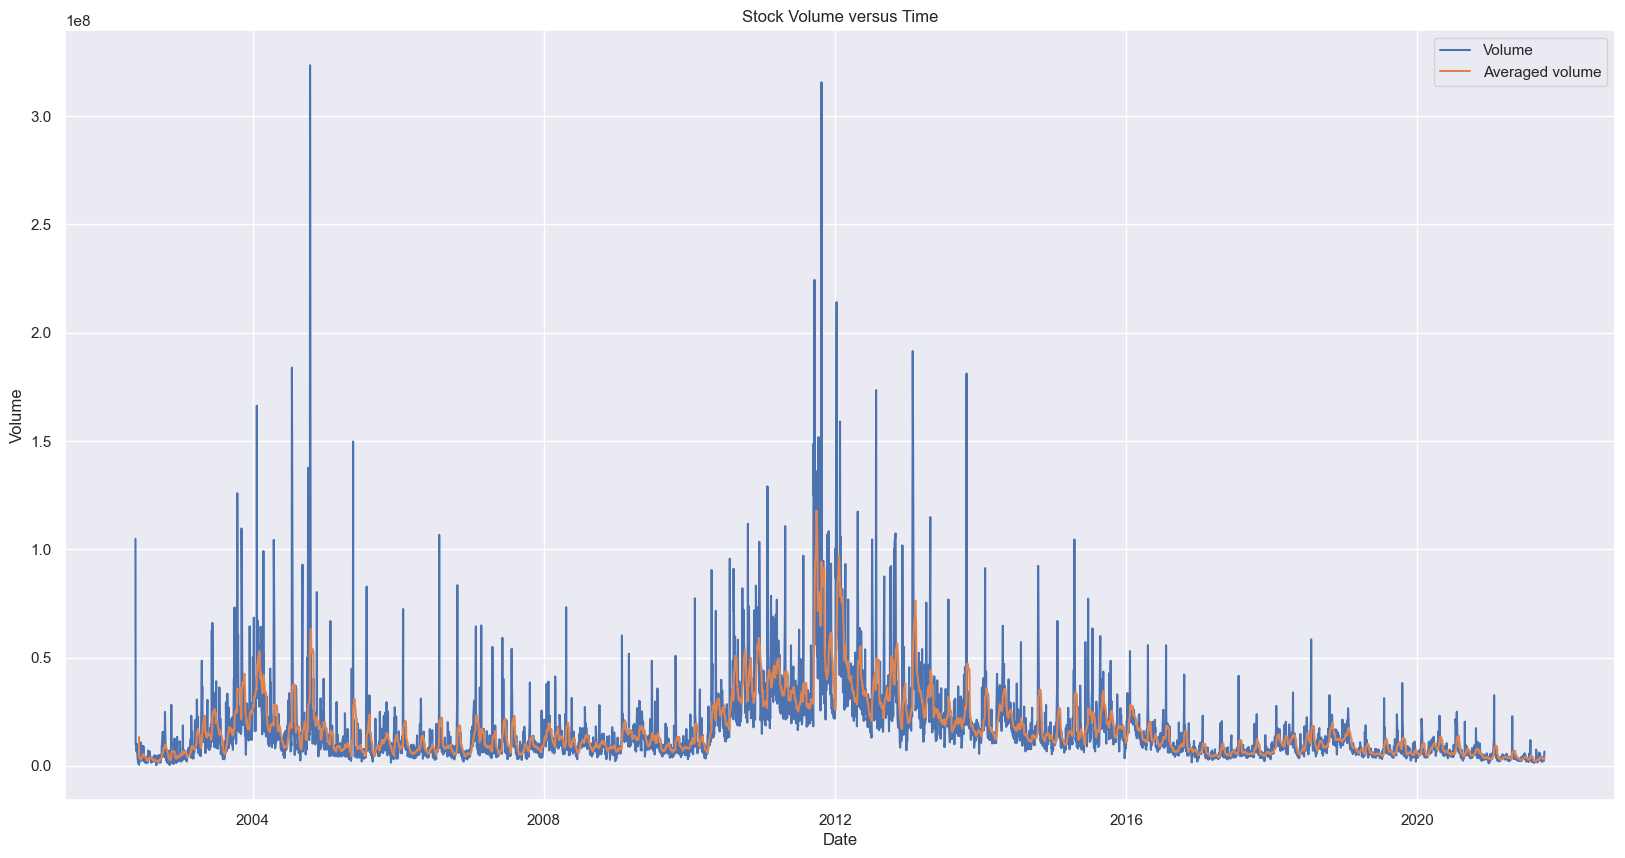

In [7]:
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(x=df.index,y=df['Volume'],label='Volume')
sns.lineplot(x=df.index,y=df['Volume'].rolling(window=12).mean(),label='Averaged volume')
plt.title('Stock Volume versus Time')

<AxesSubplot: title={'center': 'Netflix Stock Price through Time'}, xlabel='Date'>

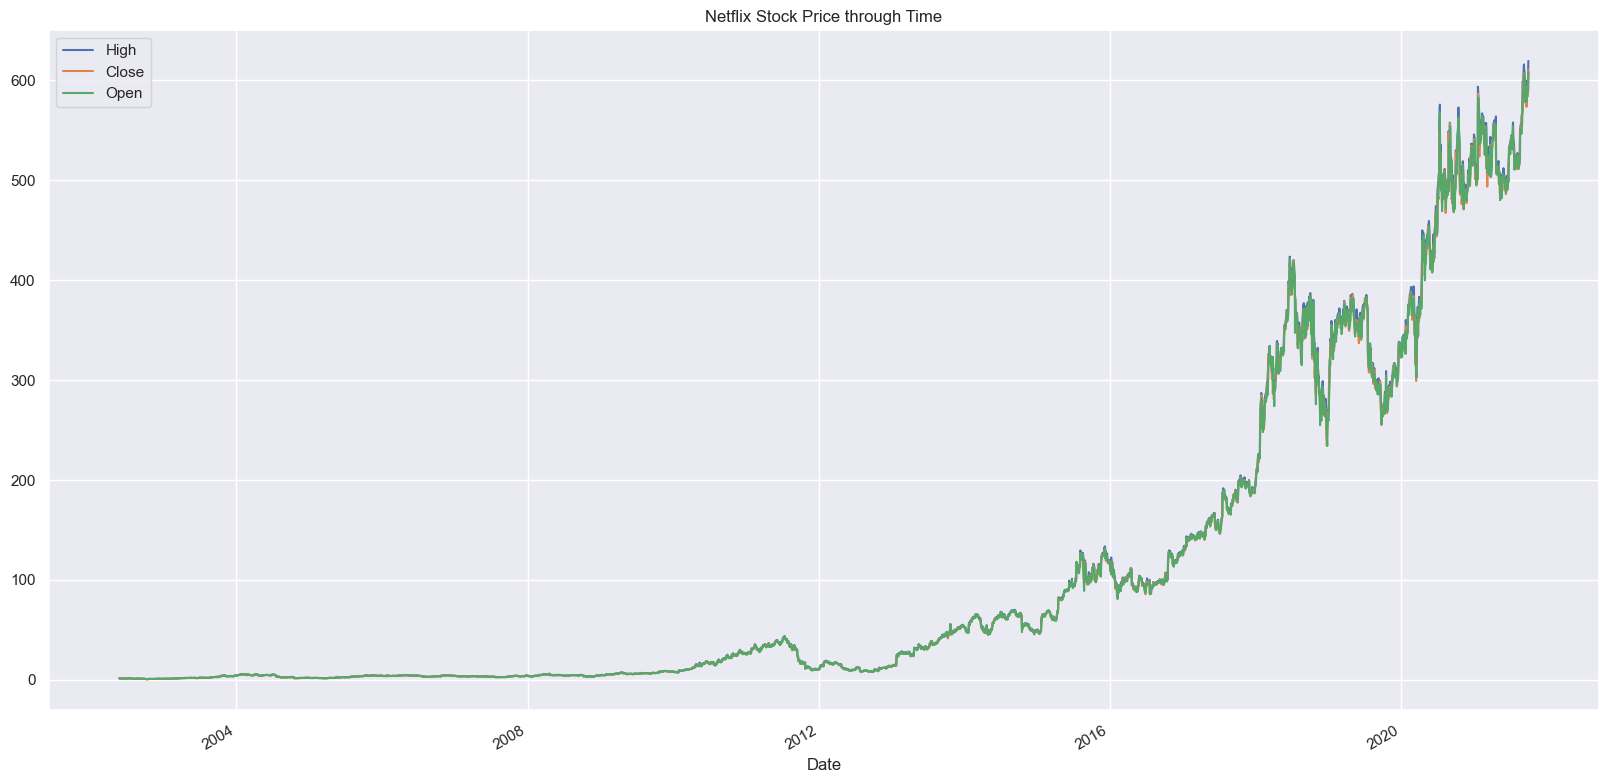

In [8]:
df.plot(y=['High','Close','Open'],title='Netflix Stock Price through Time')

<AxesSubplot: xlabel='Year'>

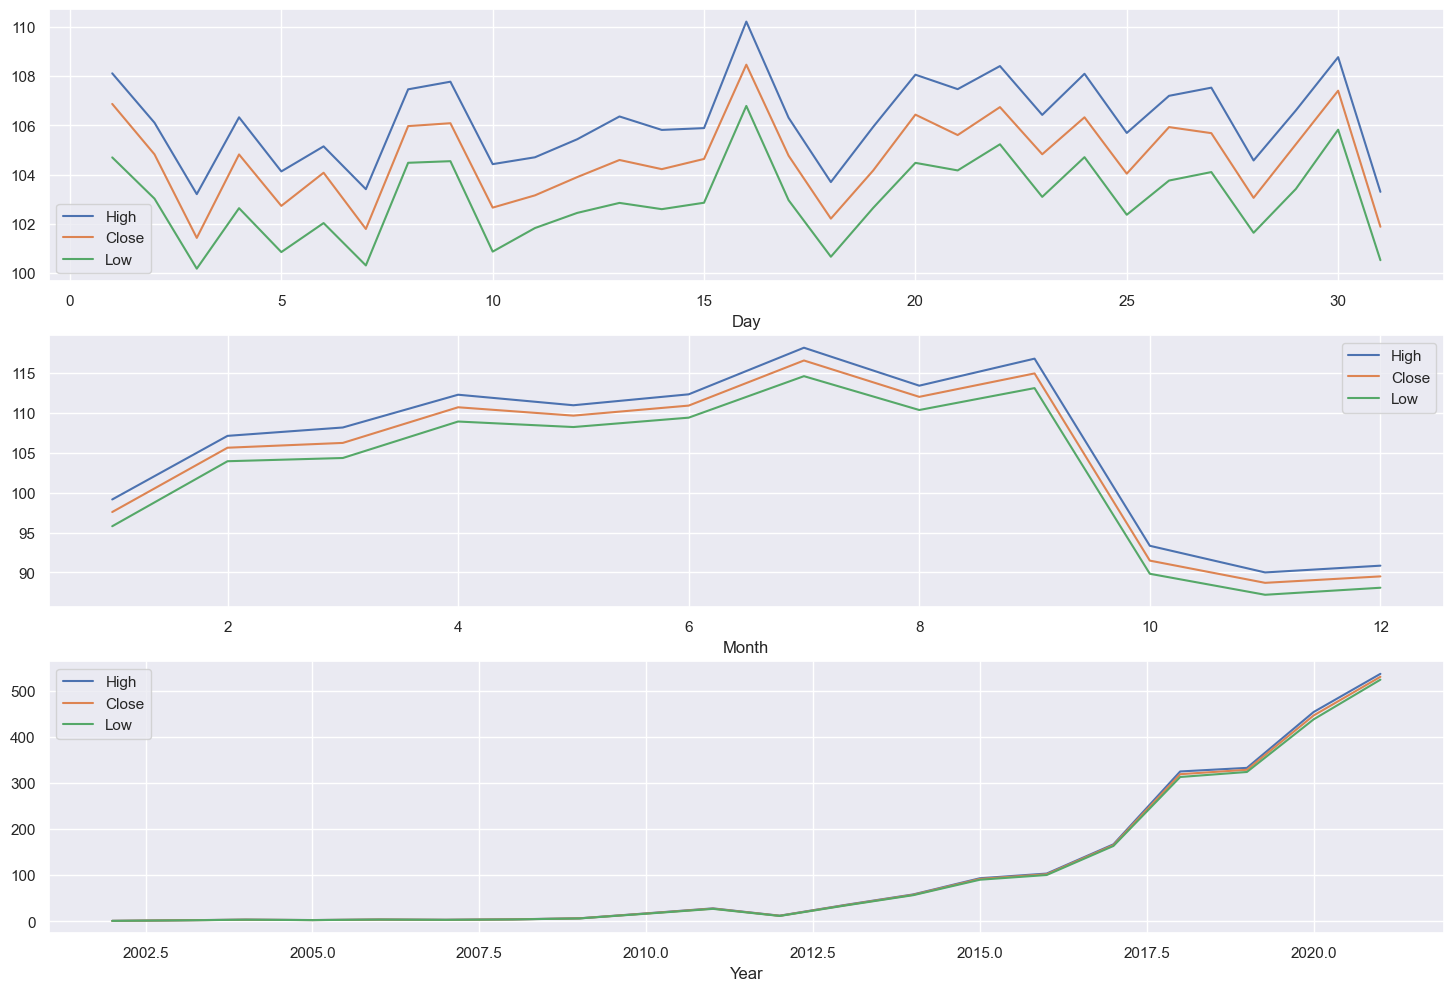

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(18, 12))

df.groupby(df.index.day).mean().plot(y=['High', 'Close', 'Low'], ax=ax1, xlabel='Day')
df.groupby(df.index.month).mean().plot(y=['High', 'Close', 'Low'], ax=ax2, xlabel='Month')
df.groupby(df.index.year).mean().plot(y=['High', 'Close', 'Low'], ax=ax3, xlabel='Year')

<AxesSubplot: xlabel='Year'>

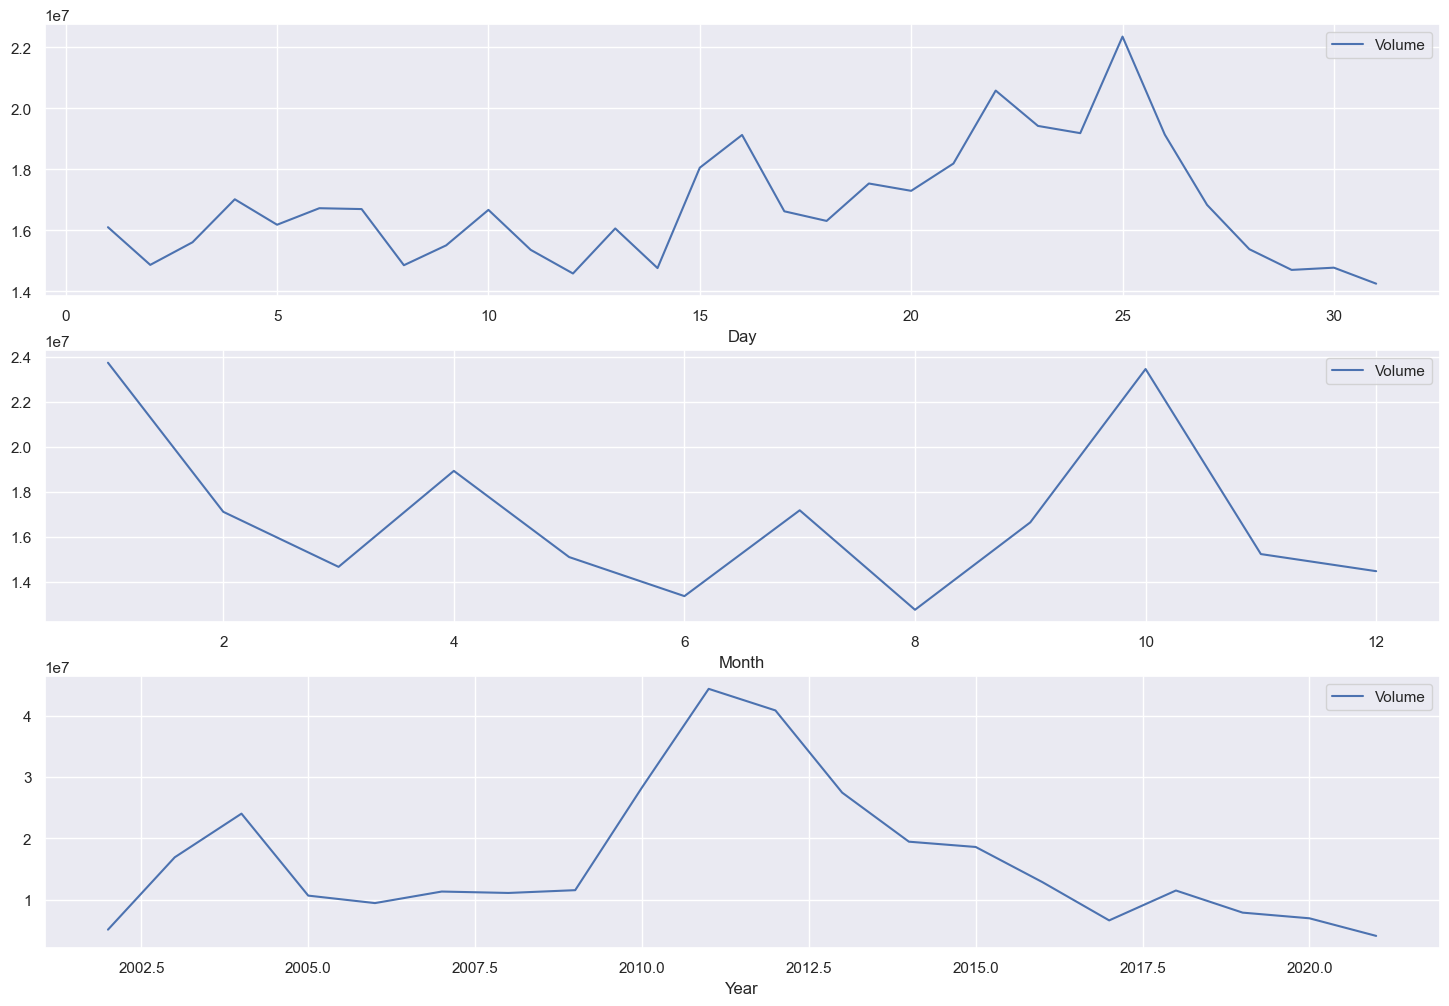

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(18, 12))

df.groupby(df.index.day).mean().plot(y='Volume', ax=ax1, xlabel='Day')
df.groupby(df.index.month).mean().plot(y='Volume', ax=ax2, xlabel='Month')
df.groupby(df.index.year).mean().plot(y='Volume', ax=ax3, xlabel='Year')

In [11]:
def plot_mean_std_time(data, featureName, chunkSize, title):
    feature = data[featureName]
    chunks = np.split(feature, chunkSize)

    means = [np.mean(chunk) for chunk in chunks]
    stds = [np.std(chunk) for chunk in chunks]
    title += ' -> through Time'
    
    plt.title(title)
    
    plt.plot(np.arange(len(means)), [feature.mean()] * len(means), label='Global [Mean]', lw=1.5, color='green')
    plt.scatter(x=np.arange(len(means)), y=means, label='Mean', s=100, color='green')

    plt.plot(np.arange(len(stds)), [feature.std()] * len(stds), label='Global [STD]', lw=1.5, color='orange')
    plt.scatter(x=np.arange(len(stds)), y=stds, label='STD', s=100, color='orange')

    plt.legend()

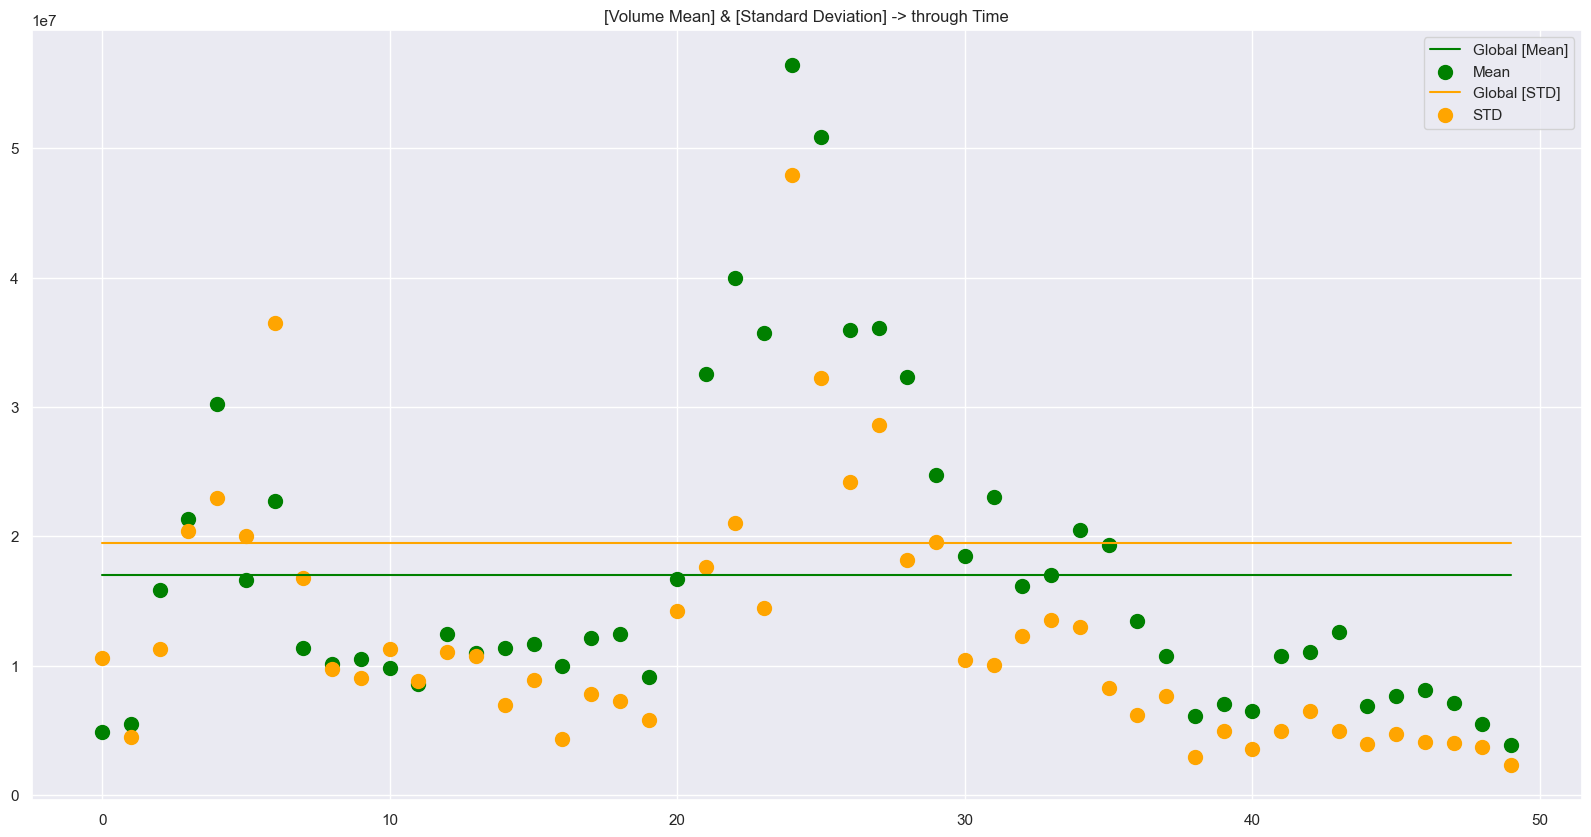

In [12]:
plot_mean_std_time(df.iloc[:4800], 'Volume', 50, '[Volume Mean] & [Standard Deviation]')

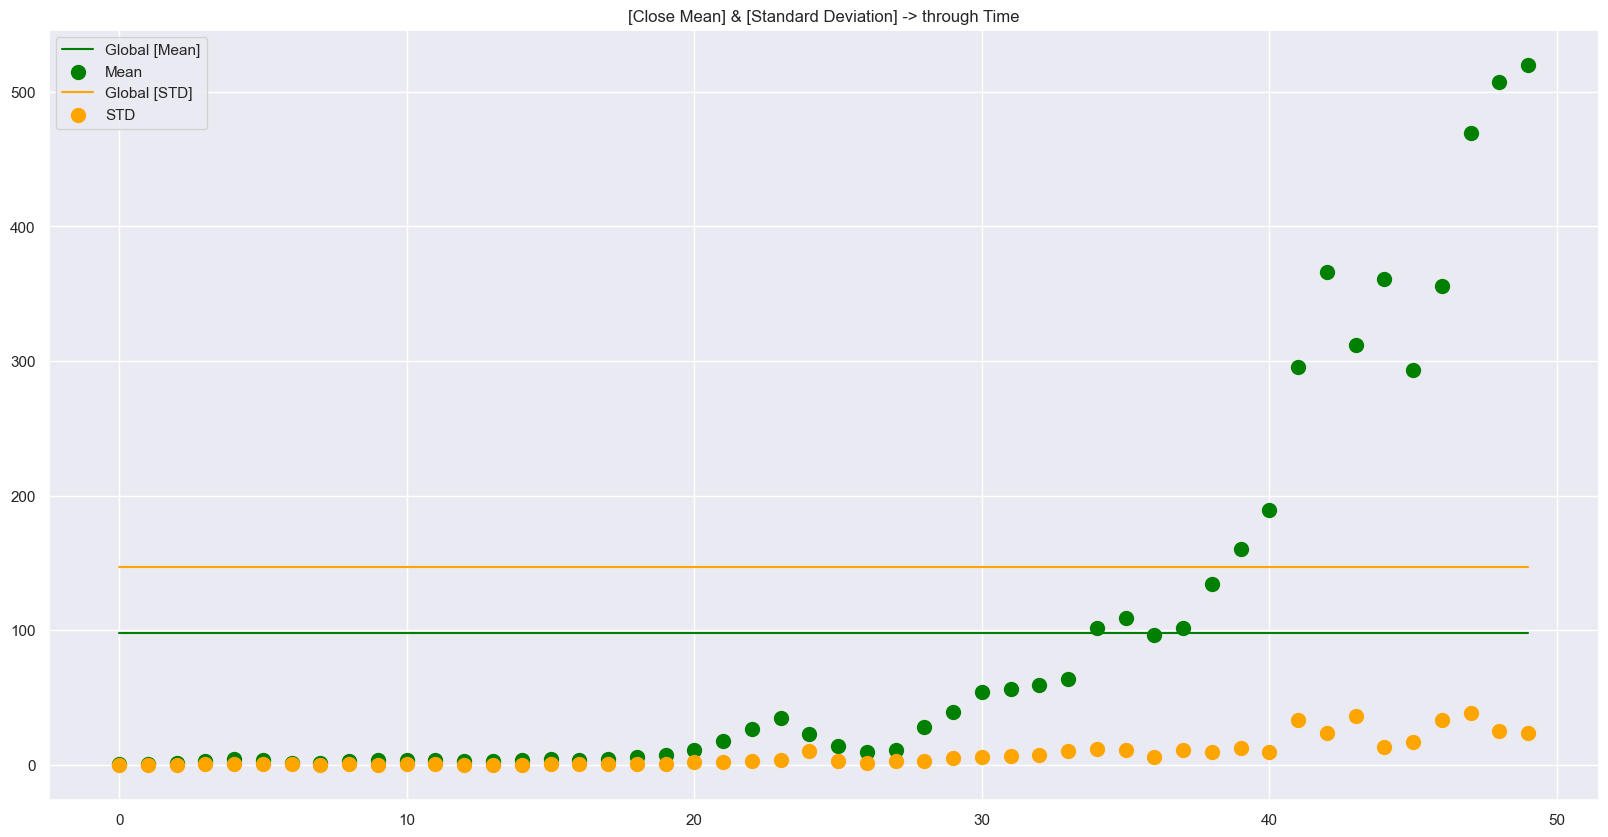

In [13]:
plot_mean_std_time(df.iloc[:4800], 'Close', 50, '[Close Mean] & [Standard Deviation]')



---



Text(0.5, 1.0, 'Volume Autocorrelation')

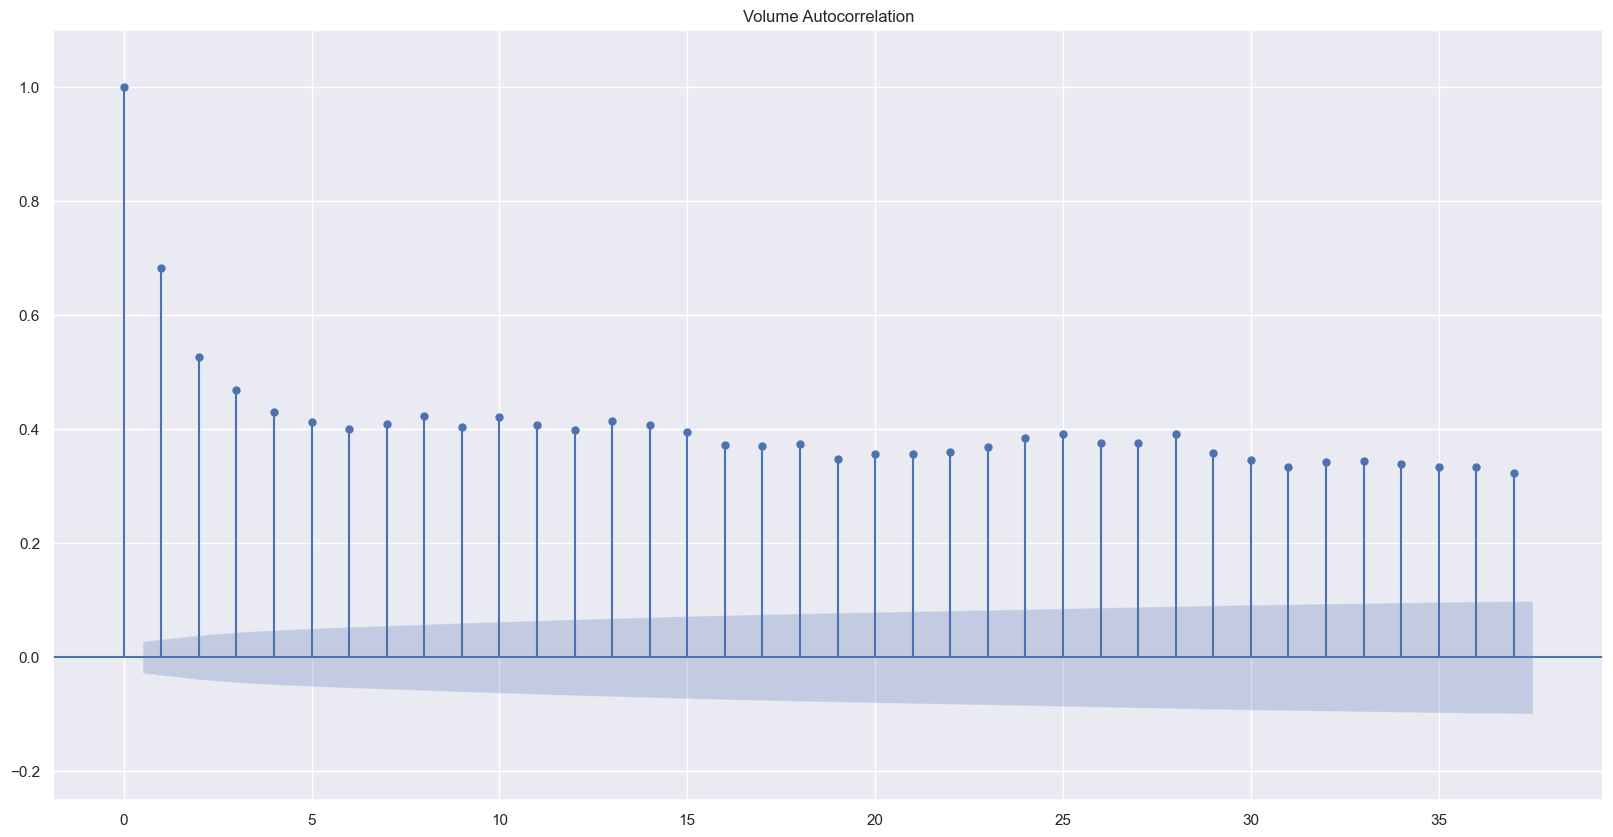

In [17]:
plot_acf(df['Volume'])
plt.ylim([-0.25, 1.1])
plt.title('Volume Autocorrelation')

Text(0.5, 1.0, 'Close Autocorrelation')

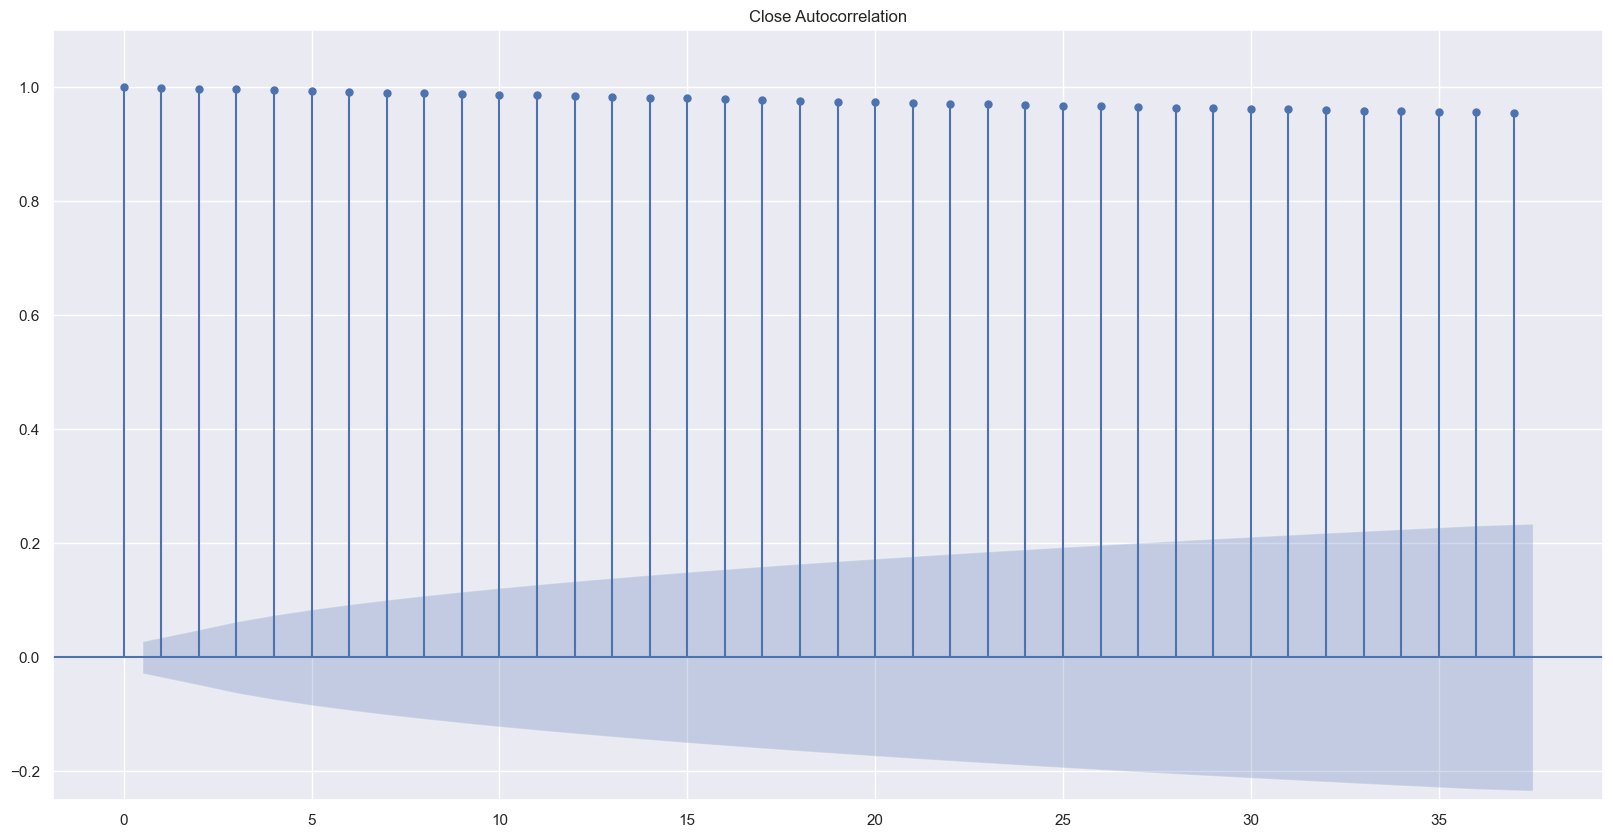

In [18]:
plot_acf(df['Close'])
plt.ylim([-0.25, 1.1])
plt.title('Close Autocorrelation')



---



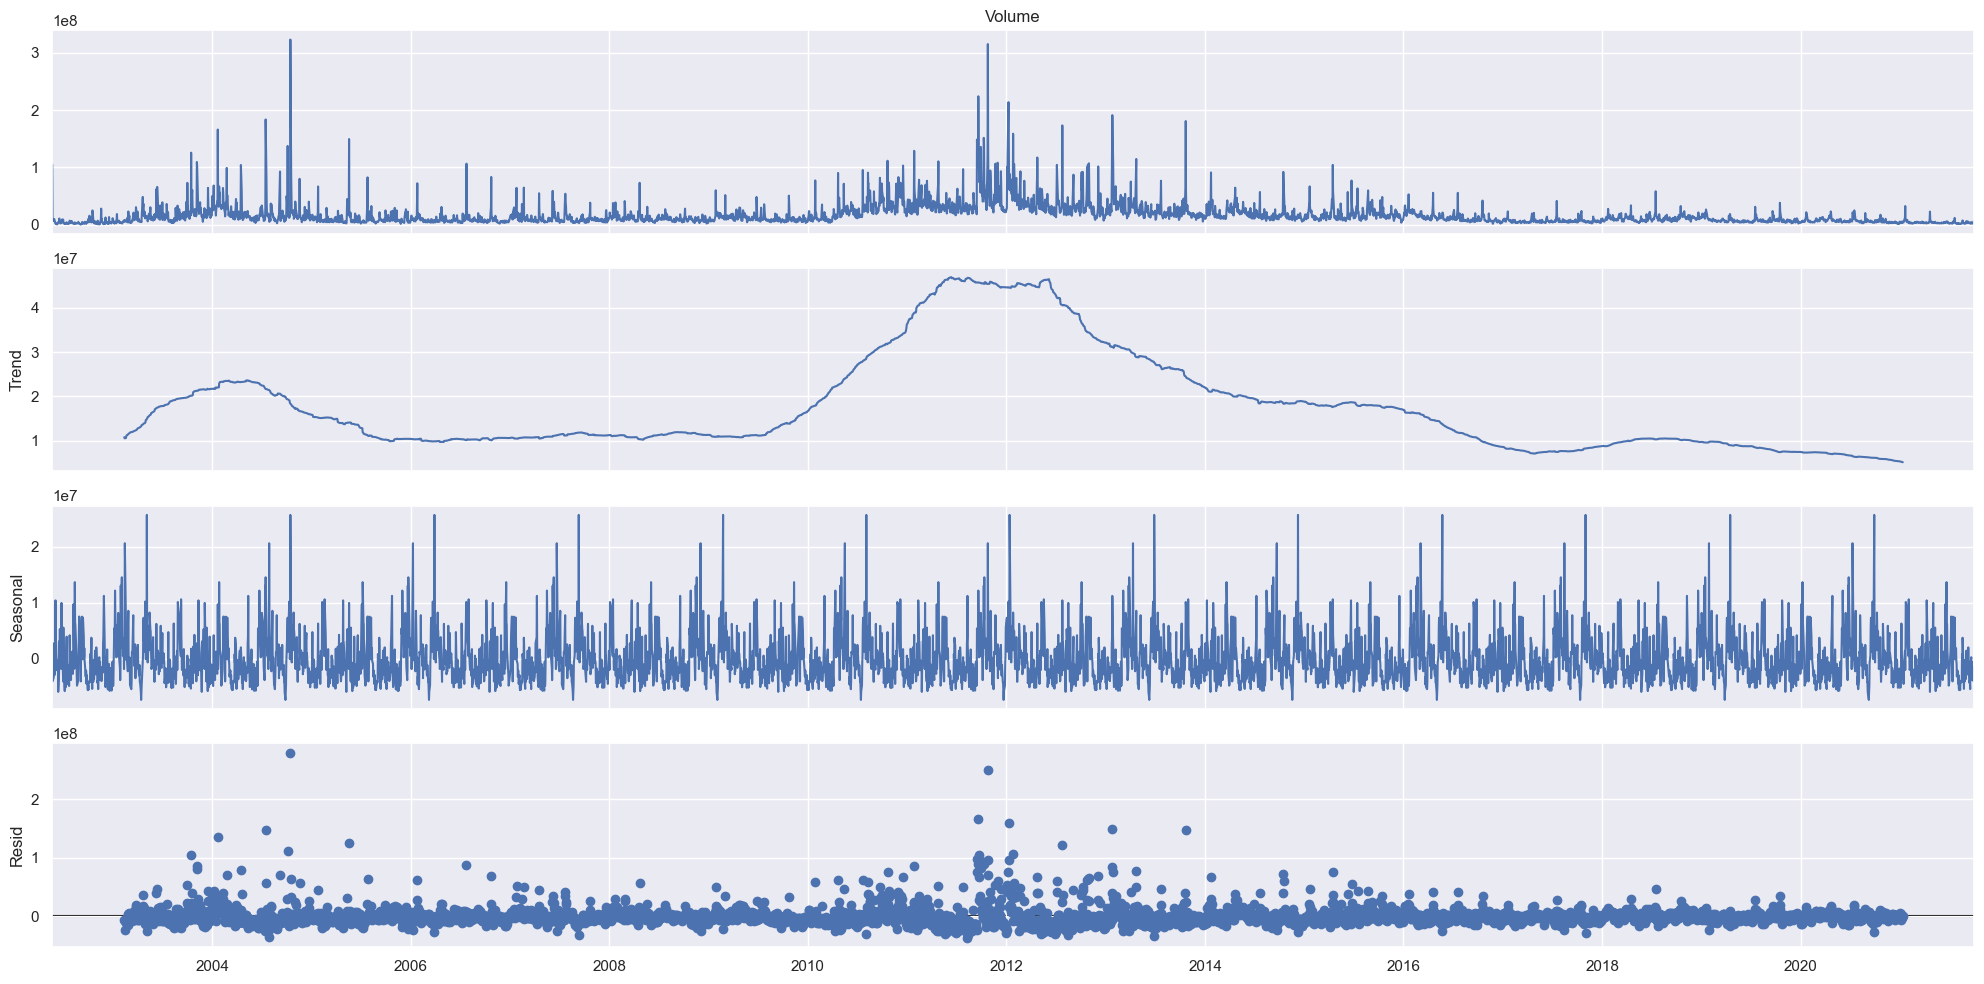

In [19]:
seasonal_decompose(df['Volume'], period=365, model='additive').plot();

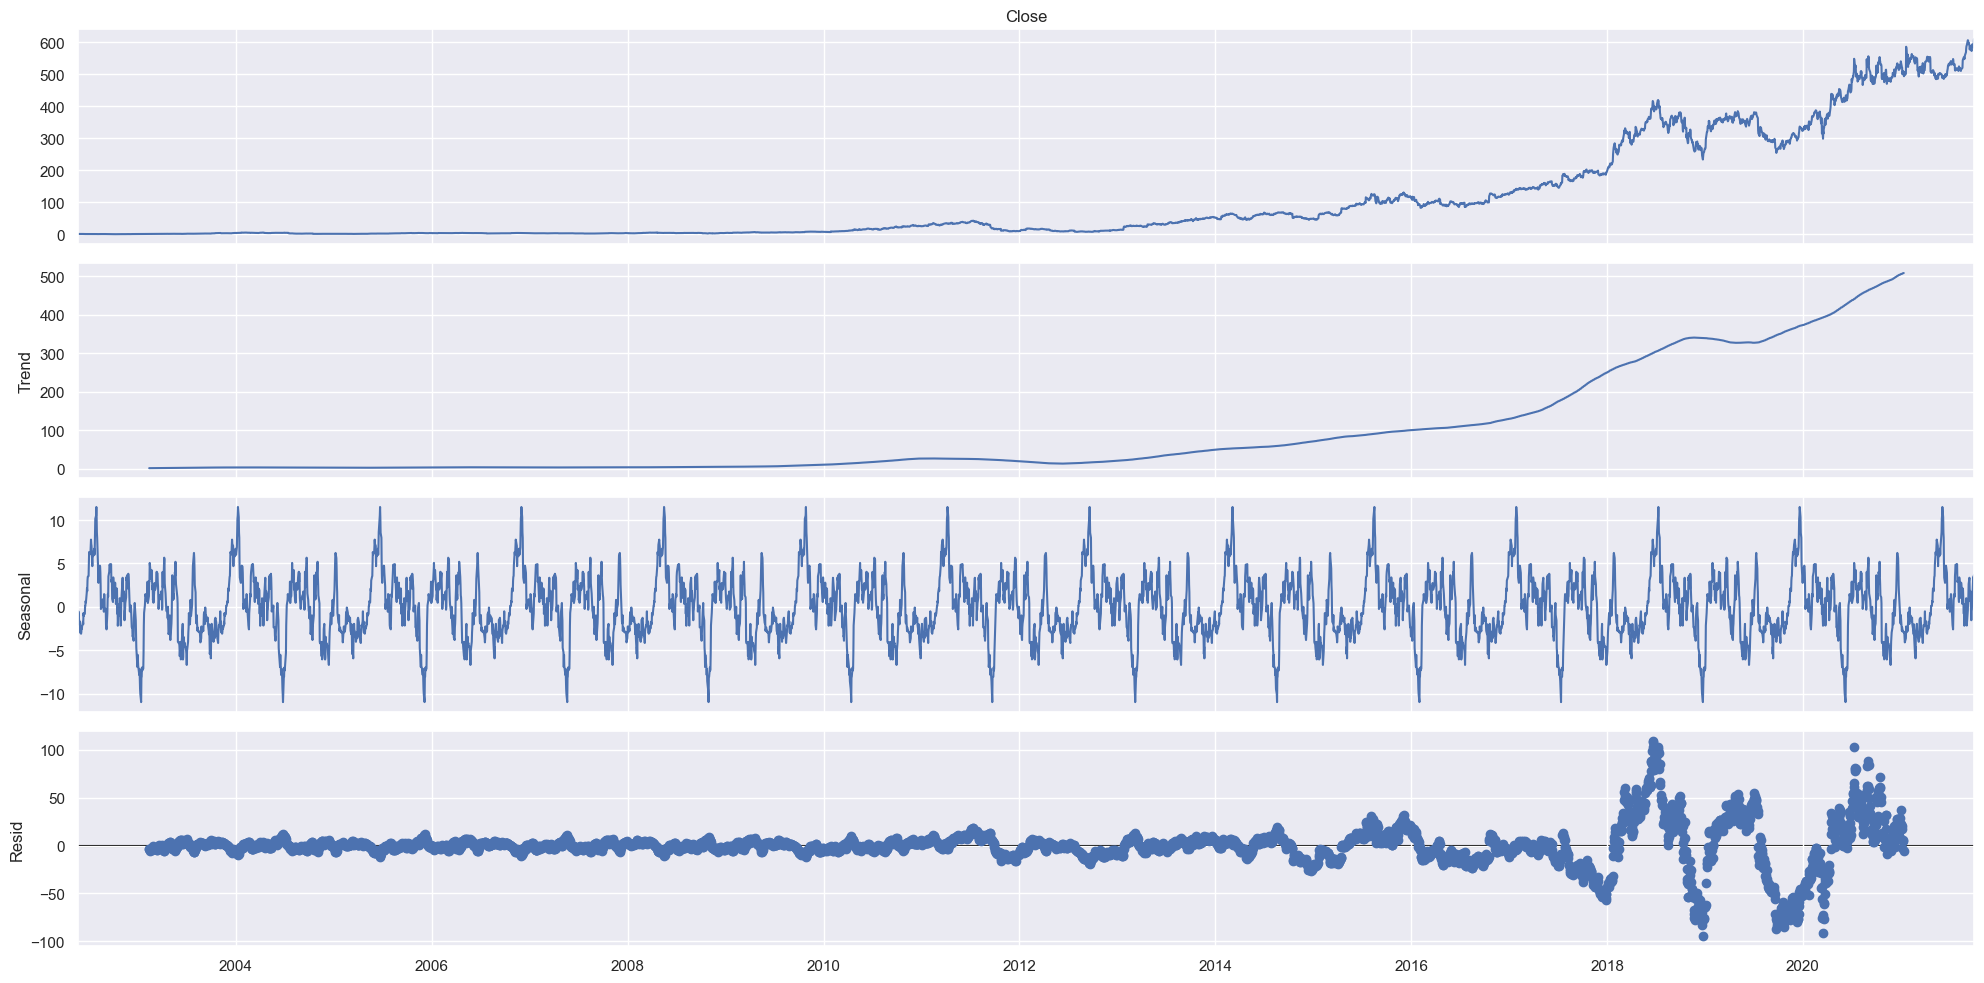

In [20]:
seasonal_decompose(df['Close'], period=365, model='additive').plot();



---



 |> ***Stationary Test (ADF Test)***
> Augmented Dickey Fuller test (ADF Test)
- is a common statistical test used to test whether a given Time series is stationary or not.

In [21]:
adf_df = pd.DataFrame(data=adfuller(df['Close']),
                      columns=['Values'],
                      index=['Test statistic',
                             'P-value',
                             'Number of lags',
                             'Number of observation',
                             'Critical values',
                             'Information criteria']
                      )
adf_df

,Values
Test statistic,2.793546
P-value,1.0
Number of lags,30
Number of observation,4843
Critical values,"{'1%': -3.4317009744827818, '5%': -2.862136980..."
Information criteria,28372.64919


In [22]:
diff1 = df['Close'].diff(1)[1:]
p_value = adfuller(diff1)
p_value

(-12.296601918385543,
 7.614255827973765e-23,
 32,
 4840,
 {'1%': -3.431701812308405,
  '5%': -2.8621373505170724,
  '10%': -2.5670879711512193},
 28348.422758580997)

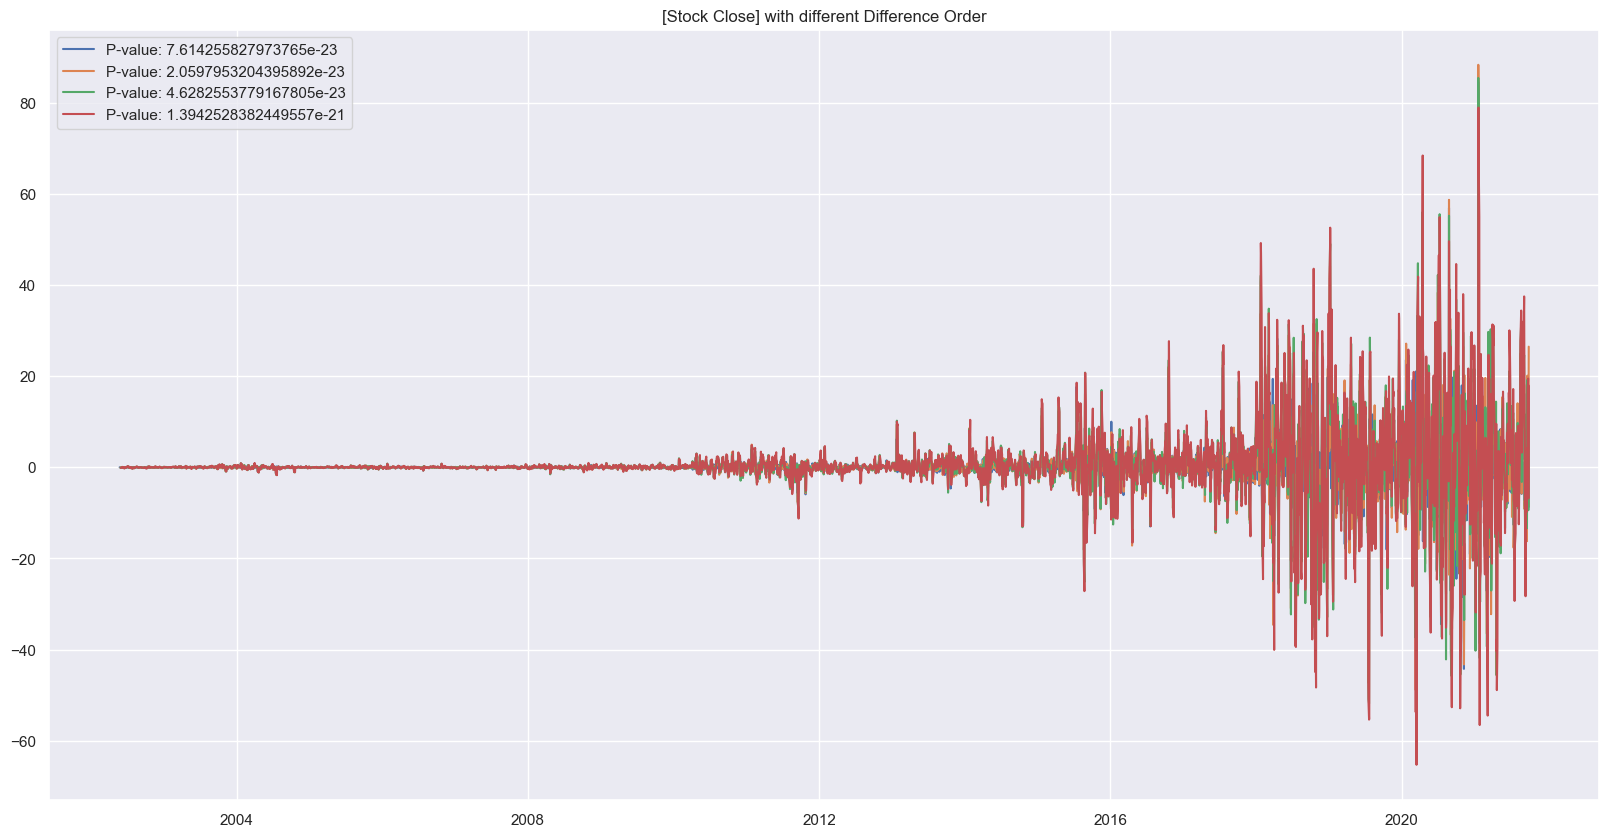

In [23]:
plt.title('[Stock Close] with different Difference Order')

for i in range(1, 5):
    p_value = adfuller(df['Close'].diff(i)[i:])[1]
    plt.plot(df['Close'].diff(i).dropna(), label=f'P-value: {p_value}')

plt.legend();

In [24]:
def make_stationary(data: pd.Series, alpha=0.05, max_diff=10):
    if adfuller(data)[1] < alpha:
      return {'diff_order':0, 'time_series': data}
    
    p_values = [(i,adfuller(data.diff(i).dropna())[1]) for i in range(1,max_diff)]

    significant = [p for p in p_values if p[1] < alpha]
    significant = sorted(significant, key=lambda x: x[1])

    diff_order = significant[0][0]

    return {'diff_order': diff_order, 'time_series': np.array(data.diff(diff_order).dropna())}

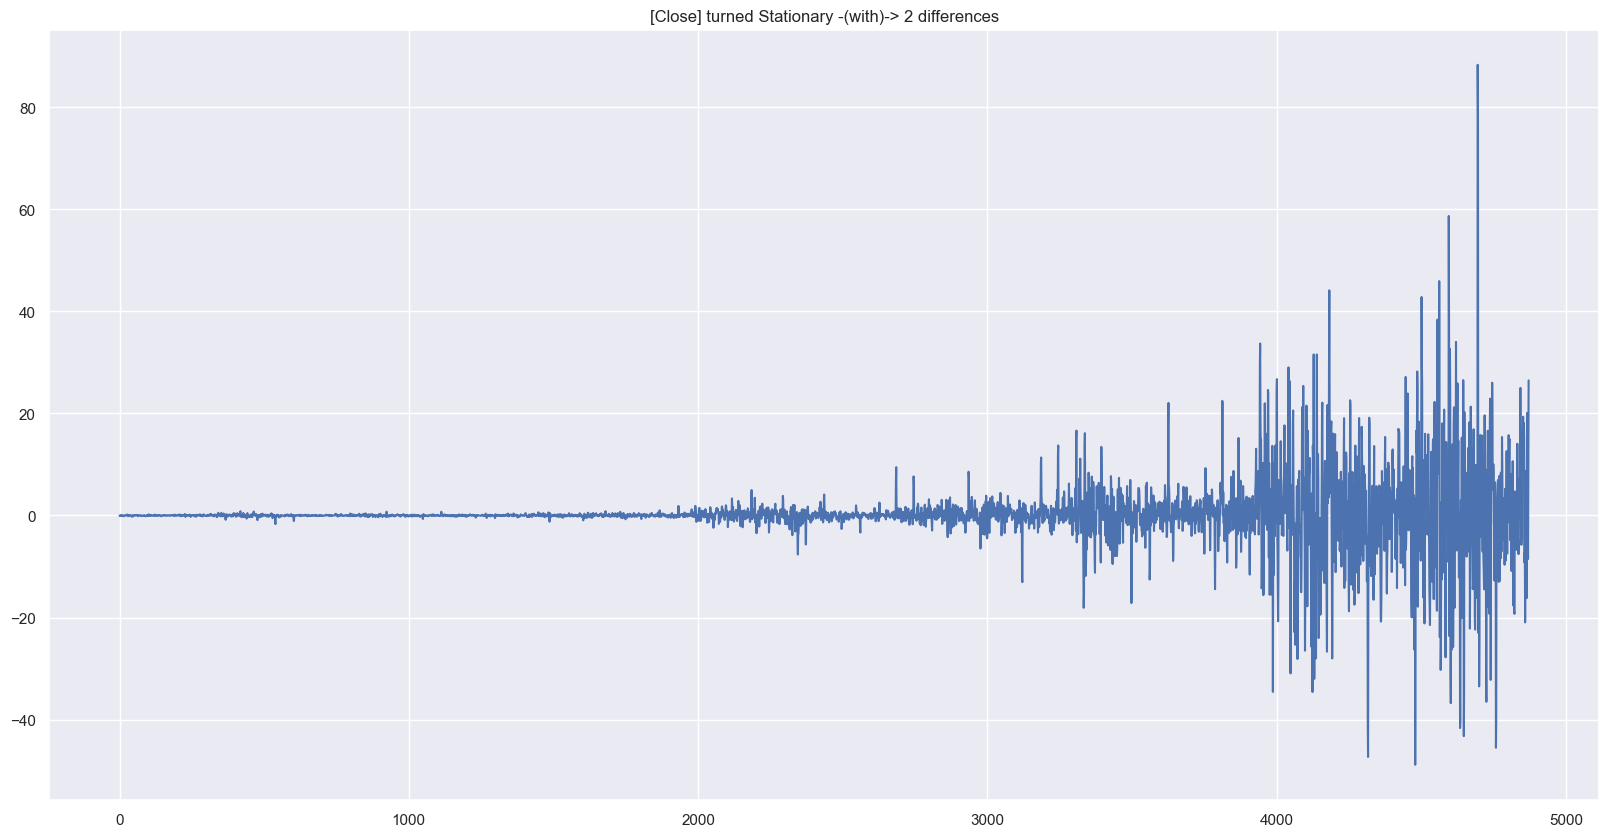

In [25]:
data = make_stationary(df['Close'])
plt.title(f"[Close] turned Stationary -(with)-> {data['diff_order']} differences")
plt.plot(data['time_series'])

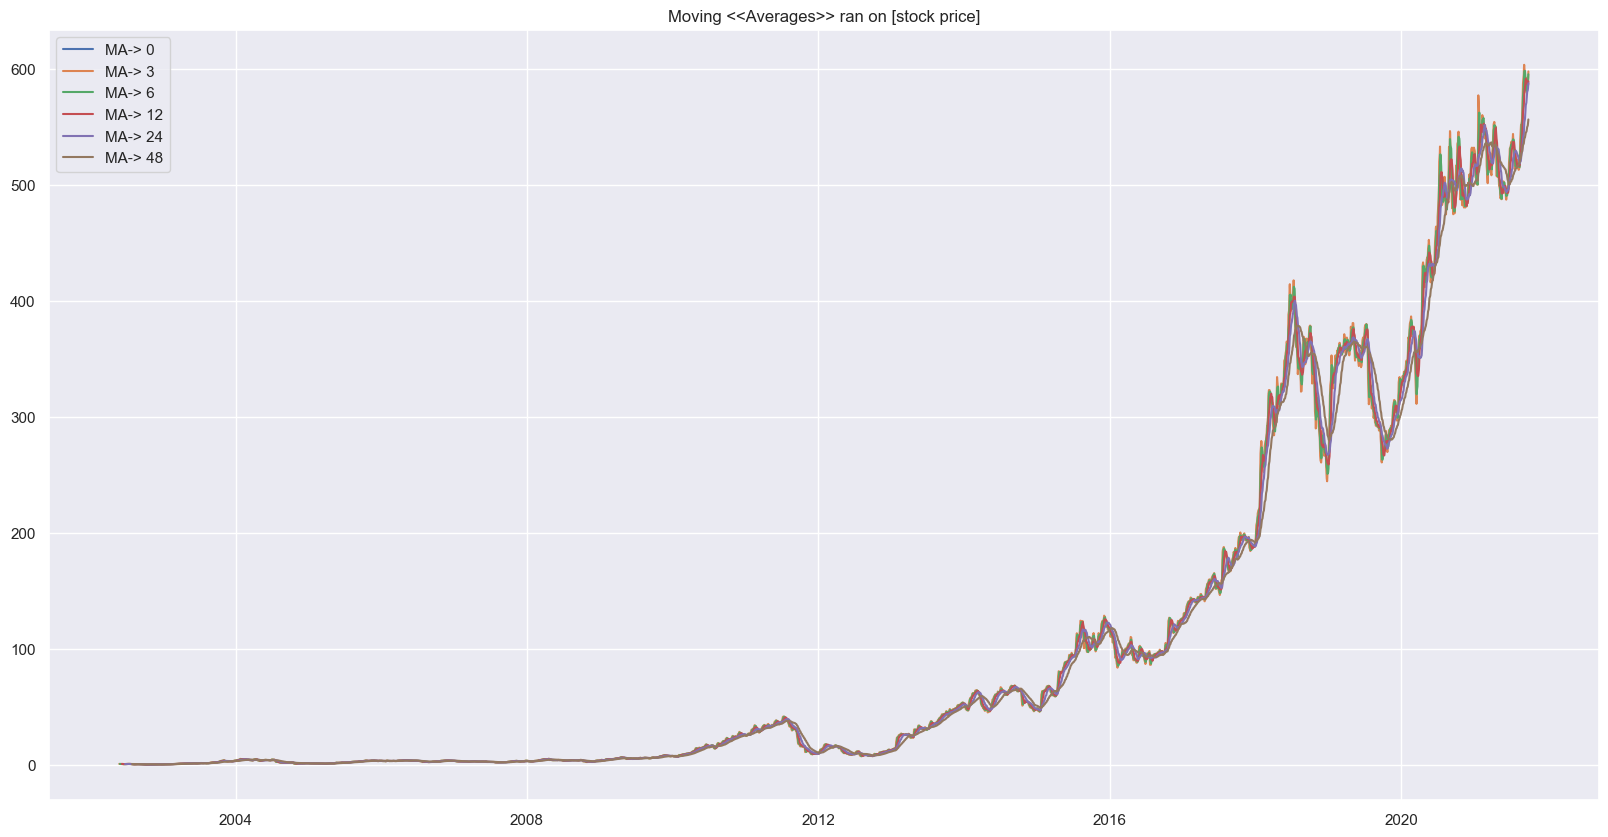

In [26]:
plt.title('Moving <<Averages>> ran on [stock price]')

for i in [0, 3, 6, 12, 24, 48]:
    plt.plot(df.rolling(i).mean() ['Close'], label=f'MA-> {i}')

plt.legend()



---



<AxesSubplot: xlabel='Date'>

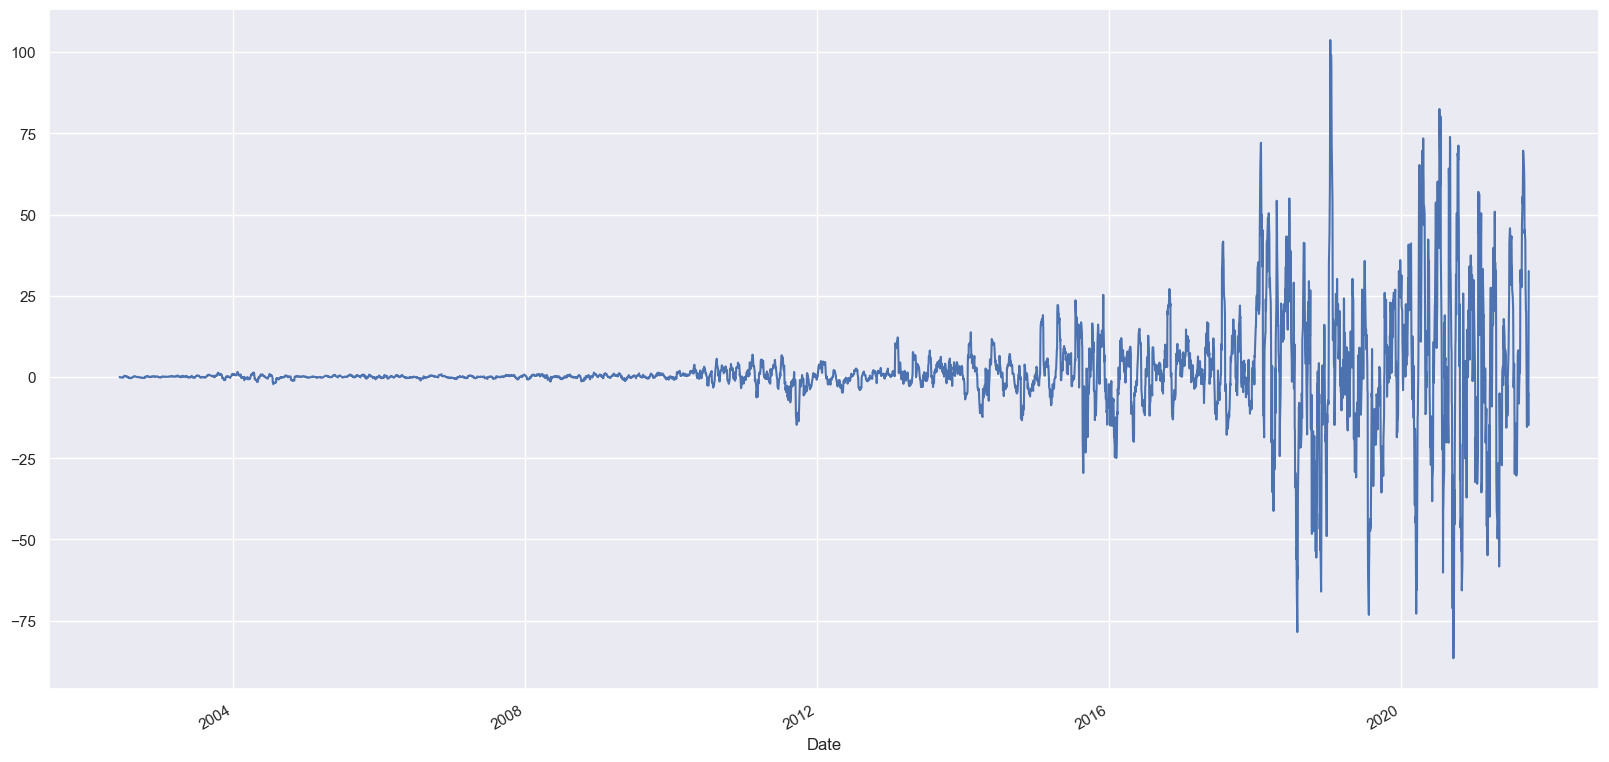

In [27]:
seas_diff = df['Close'] - df['Close'].shift(12)
seas_diff.plot()

In [28]:
adfuller(seas_diff.dropna())

(-10.909802755805167,
 1.1043216014983088e-19,
 32,
 4829,
 {'1%': -3.4317048932467036,
  '5%': -2.862138711638667,
  '10%': -2.56708869573285},
 29683.740701656396)

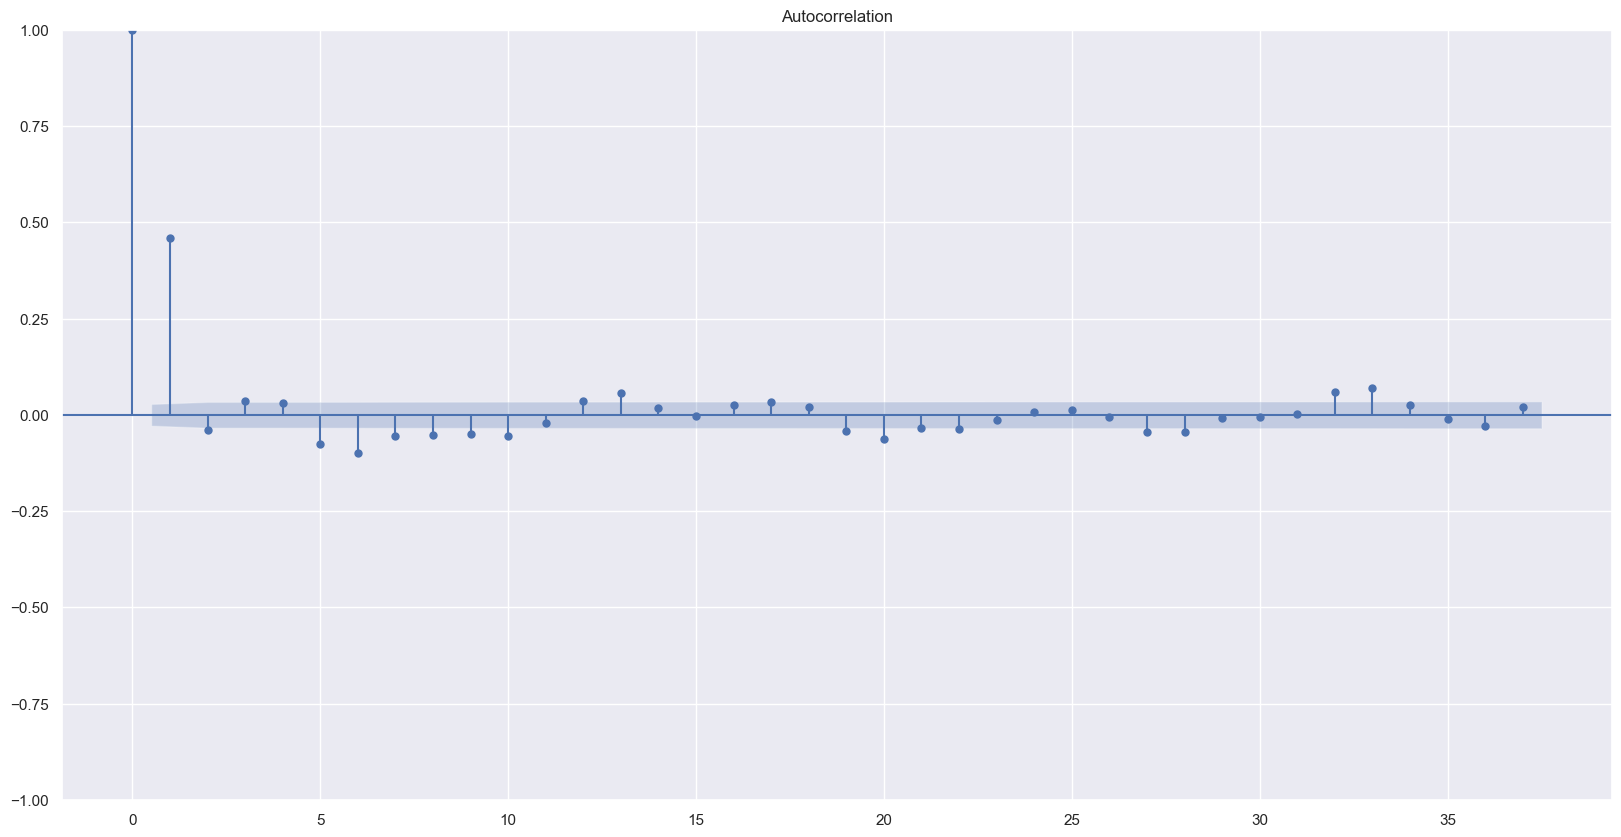

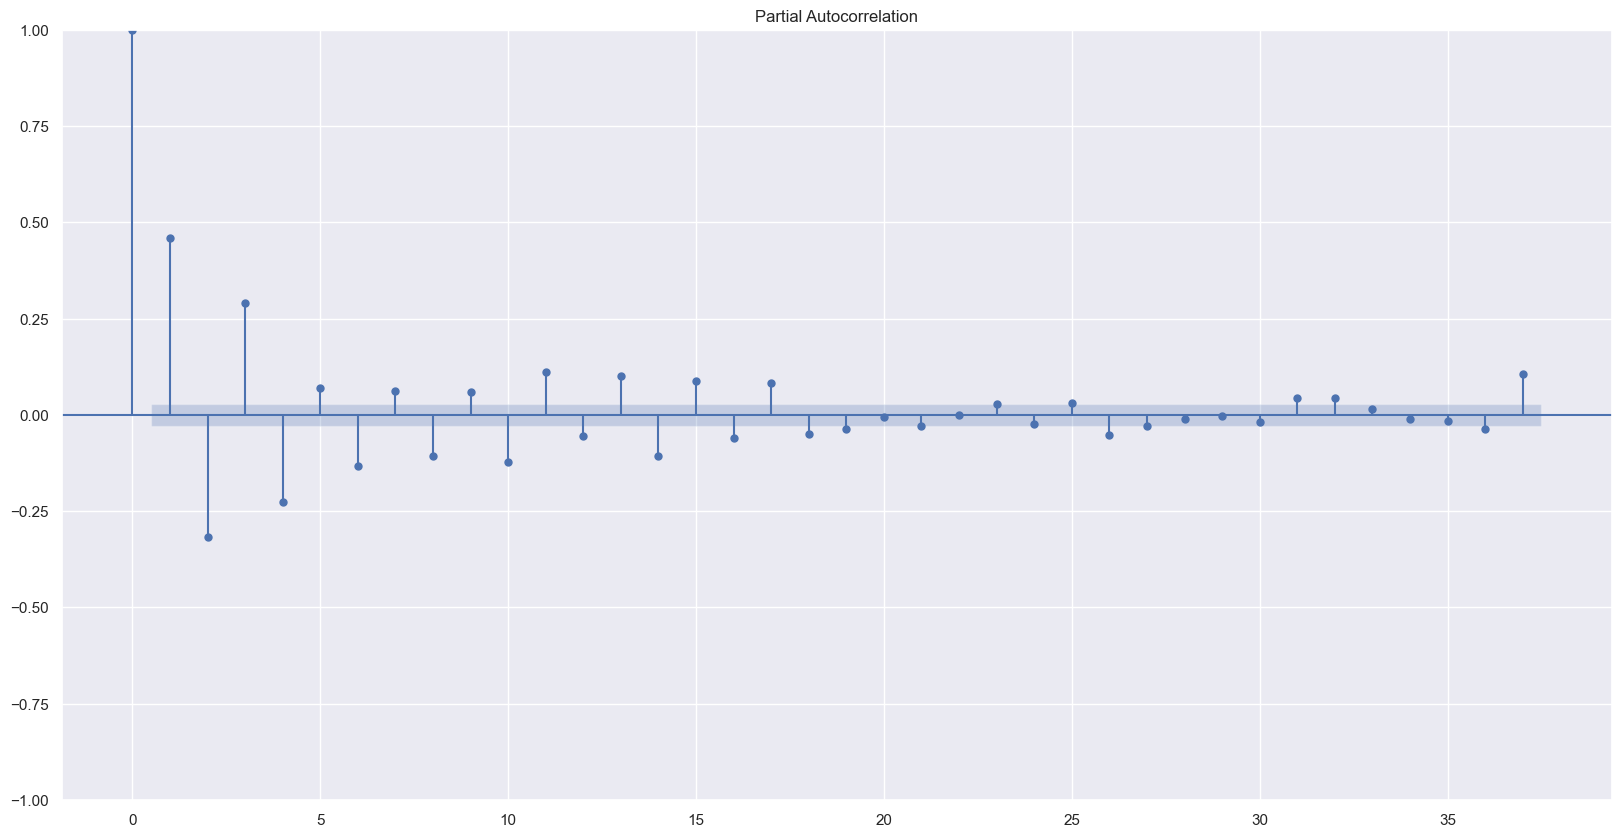

In [29]:
plot_acf(df['Close'].diff(2).dropna())
plot_pacf(df['Close'].diff(2).dropna());

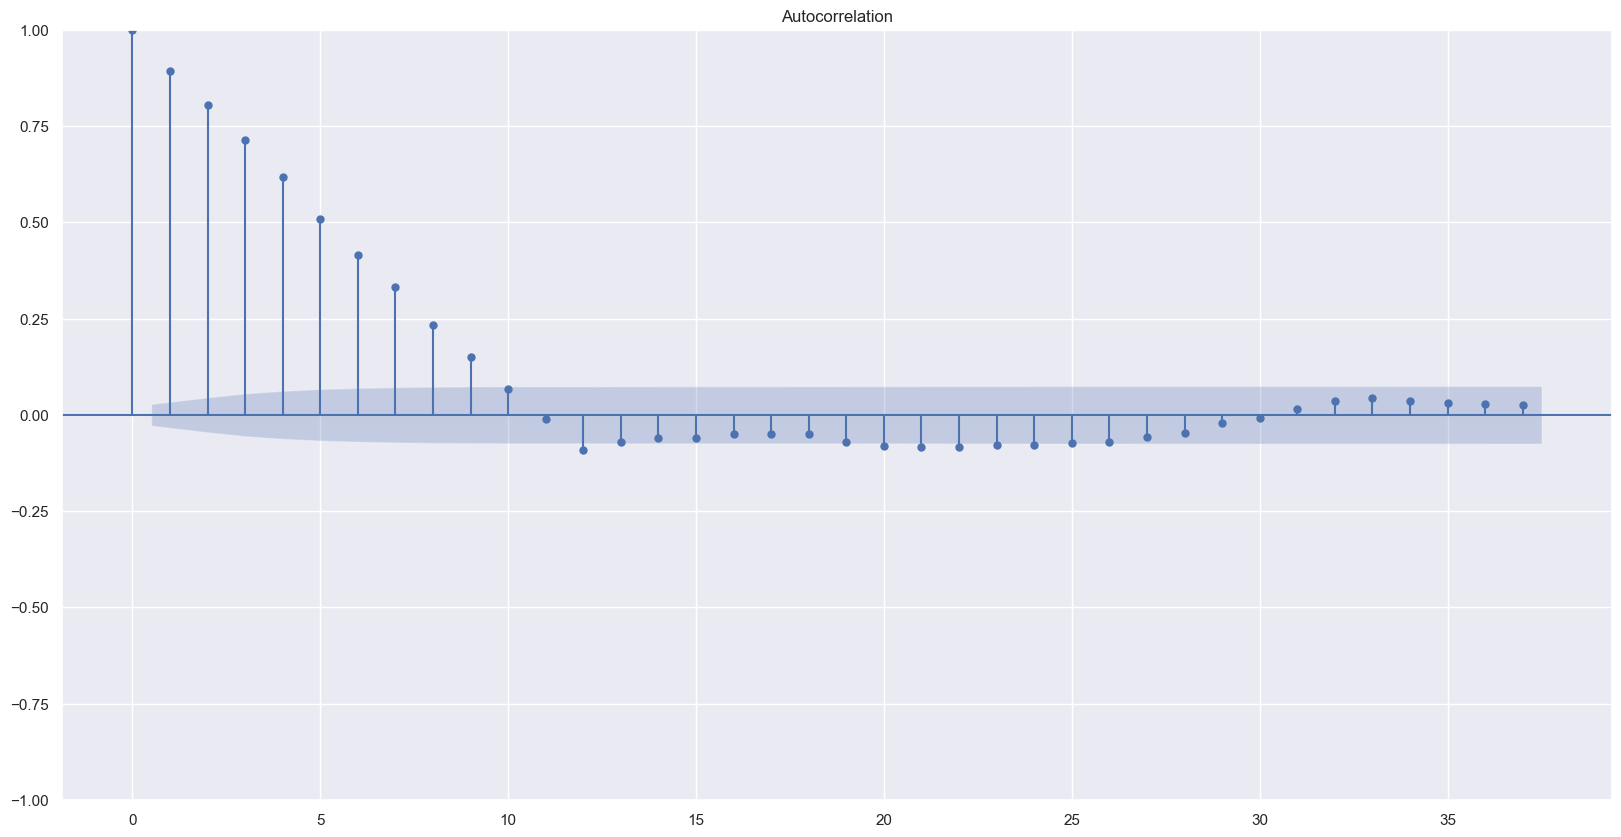

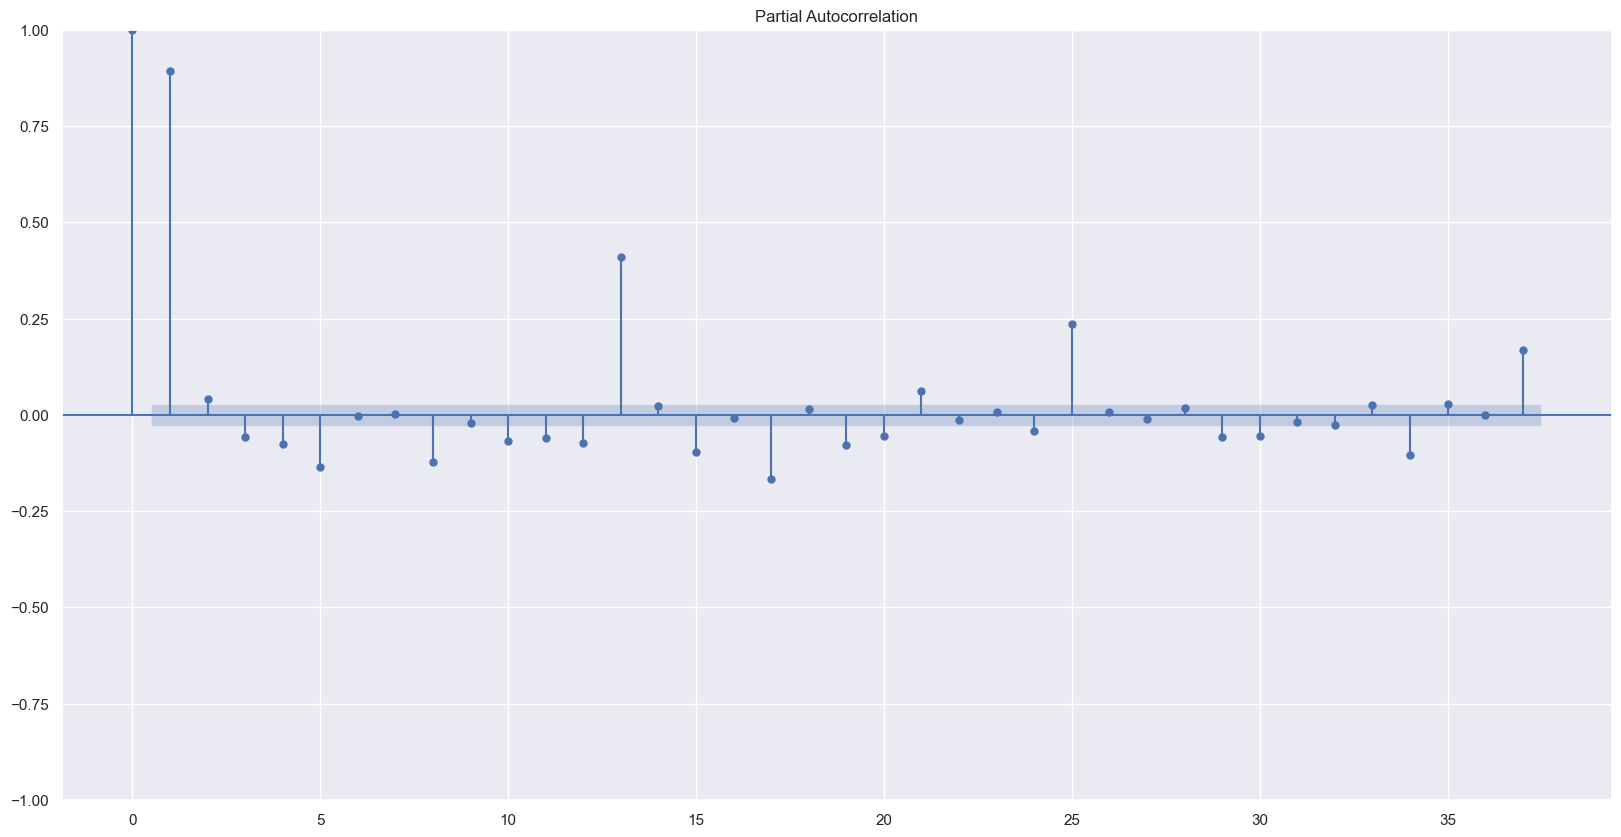

In [30]:
plot_acf(seas_diff.dropna())
plot_pacf(seas_diff.dropna());

In [31]:
stationary_ts = df['Close'].diff(2).dropna()
stationary_ts = stationary_ts.resample('M').mean()
train_len = int(0.7*len(stationary_ts))

In [32]:
model = SARIMAX(stationary_ts.iloc[:train_len], 
                order=(1, 2, 1),
                seasonal_order=(1, 0, 0, 12))

result = model.fit()

<AxesSubplot: ylabel='Density'>

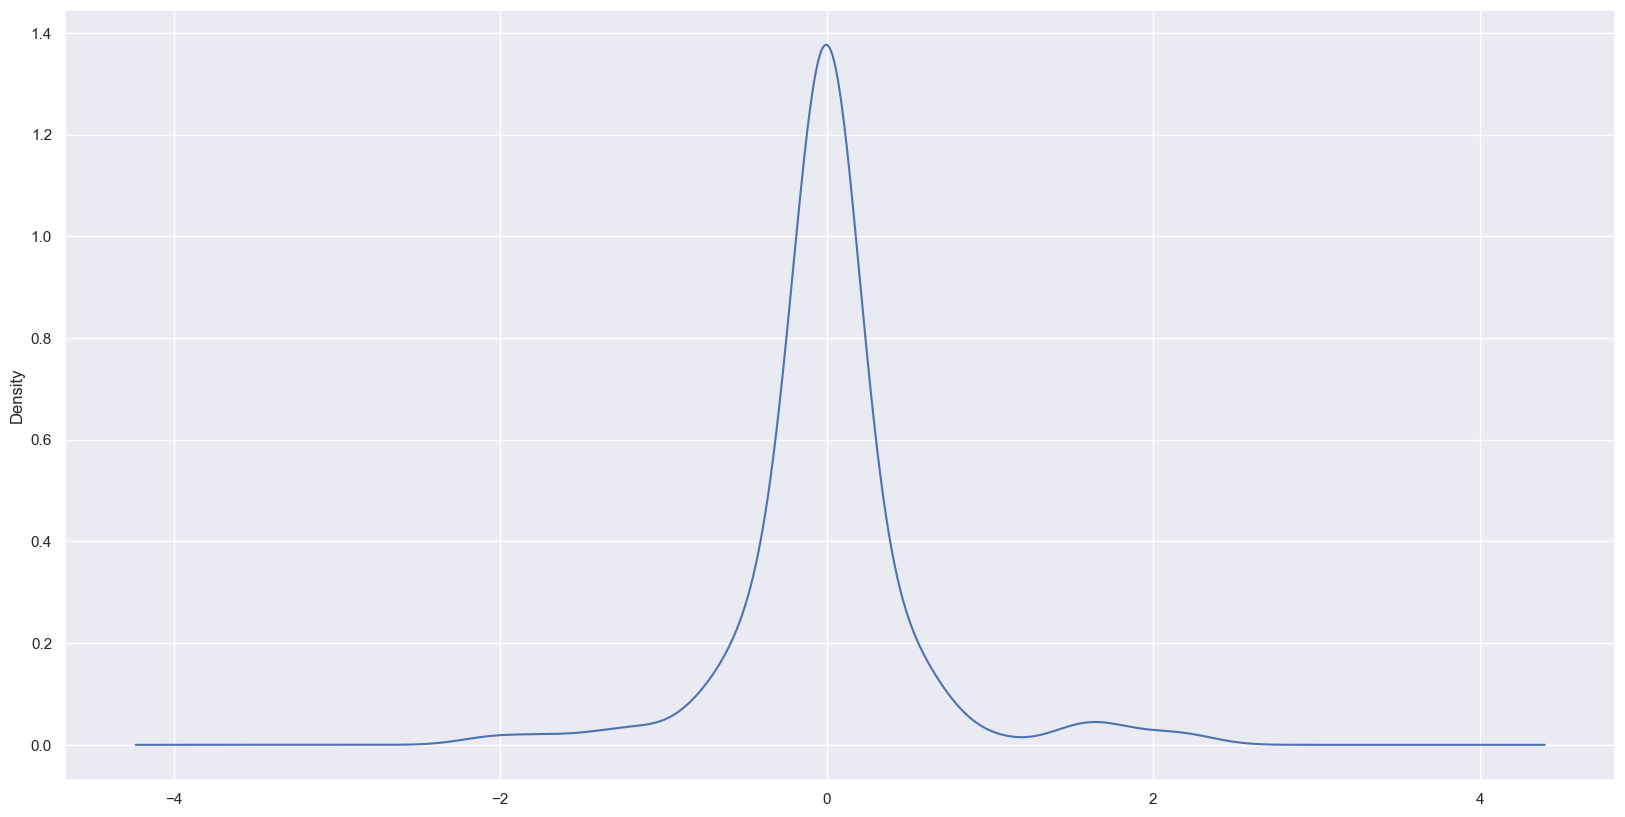

In [33]:
result.resid.plot(kind='kde')



---



> ### |> ***Predicting Stock Price***

<AxesSubplot: title={'center': 'Predicting -> Netflix Stock Price'}, xlabel='Date'>

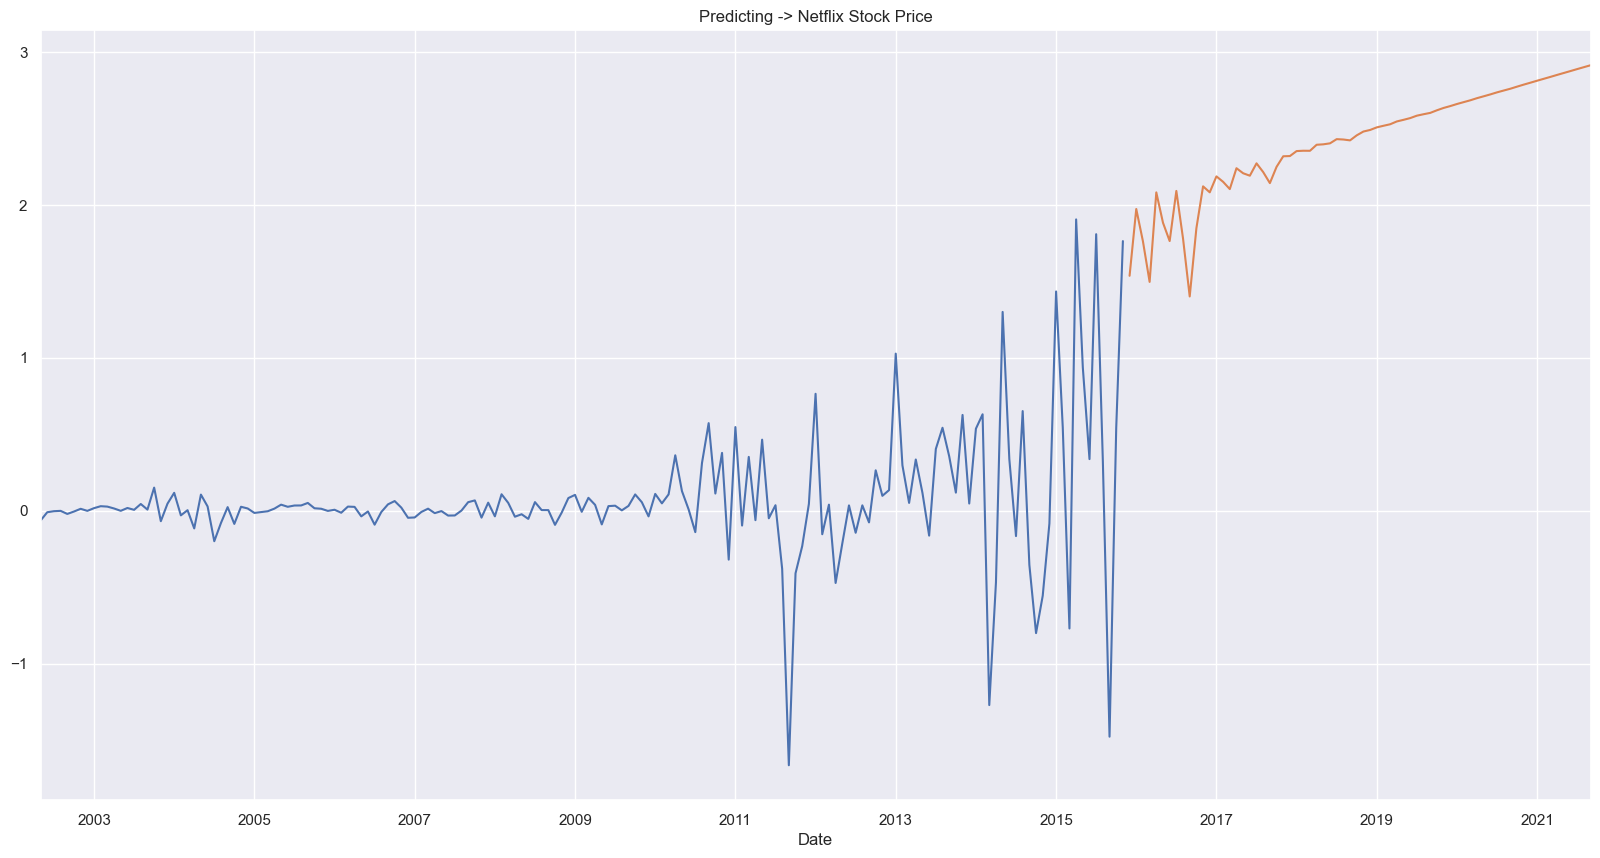

In [34]:
start, end = stationary_ts.index.values[train_len], stationary_ts.index.values[-1]
predictions = result.predict(start=start, end=end)

plt.title('Predicting -> Netflix Stock Price')
stationary_ts.iloc[:train_len].plot()

predictions.dropna().plot()

<AxesSubplot: title={'center': 'Comparing -> [Predicted Stock Price] vs [Actual Stock Price]'}, xlabel='Date'>

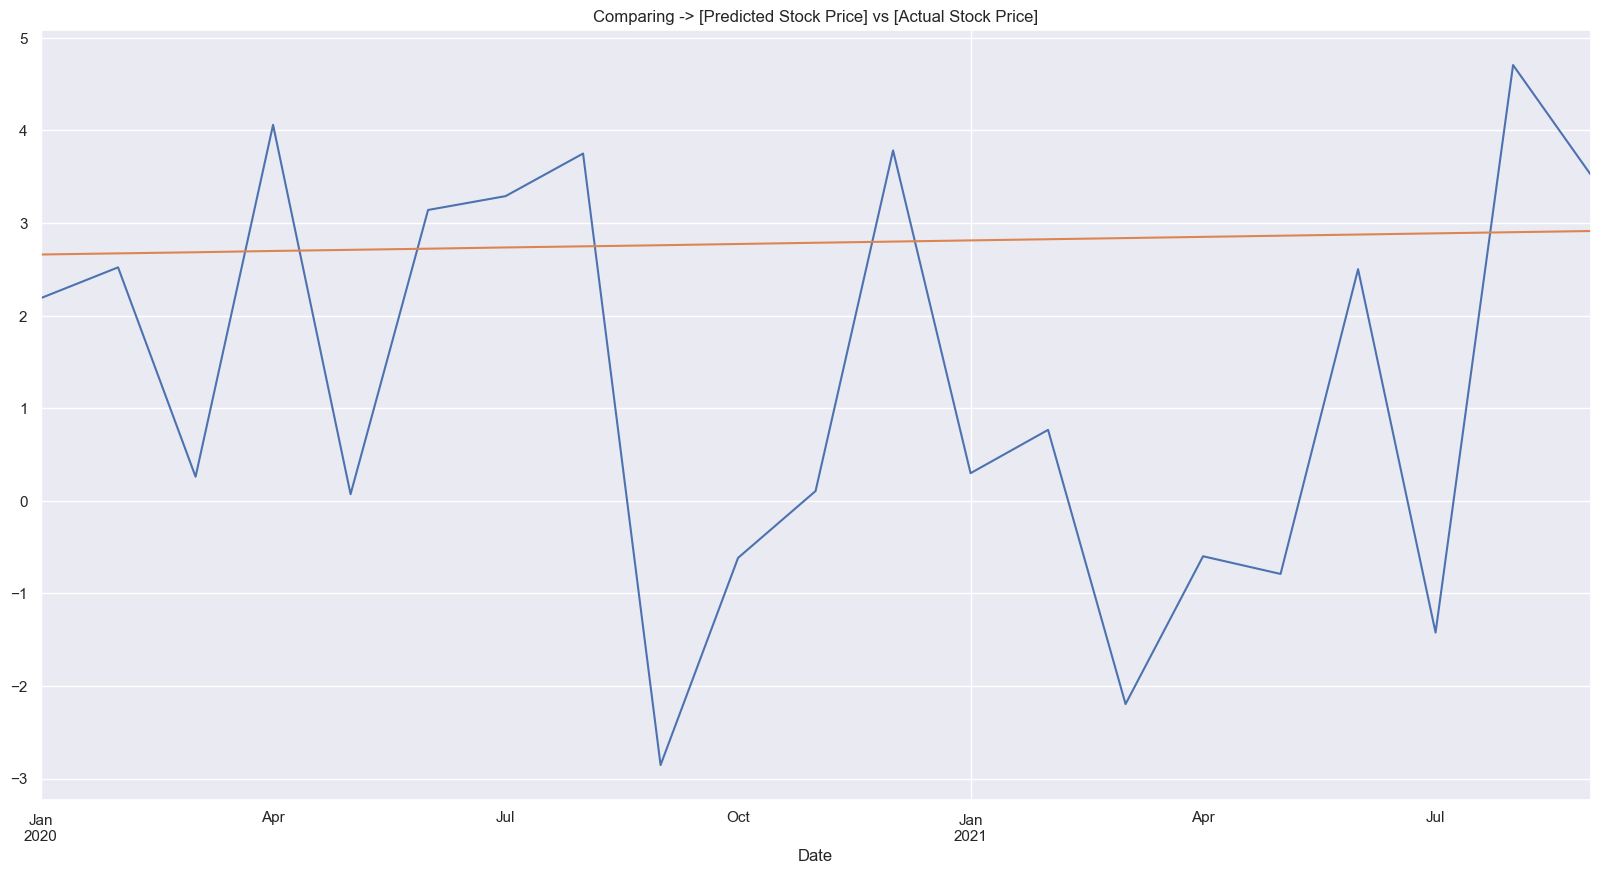

In [35]:
plt.title('Comparing -> [Predicted Stock Price] vs [Actual Stock Price]')
stationary_ts.loc[stationary_ts.index.year > 2019].plot()
predictions.dropna().loc[predictions.index.year > 2019].plot()



---


> Summary, in order to use an ARIMA model to forecast a time series we do the following:

- Split the time series into train and test data.
- Check if the data is seasonal or not (In the case of a stock price it's most likely to be)
- Apply differencing to turn the time series into stationary by using the ADF test (keep doing so until the ADF rejects and saves the order of differencing as d for ARIMA).
- Use the autocorrelation and partial autocorrelation plot to estimate p,P and q,Q (P,Q are in case time series is seasonal)
- Fine tune using GridSearch.


---



In [36]:
def train_arima(p, q, train_per=0.7):
    train_len = int(train_per*len(stationary_ts))
    model = SARIMAX(stationary_ts.iloc[:train_len], 
                    order=(p,2,q),
                    seasonal_order=(1, 0, 0, 12))
    
    start,end = stationary_ts.index.values[train_len], stationary_ts.index.values[-1]
    predictions = result.predict(start=start, end=end)

    plt.title(f'Forecasting Netflix stock price with values of p={p} and q={q}')
    stationary_ts.plot()
    predictions.dropna().plot()
    plt.show()

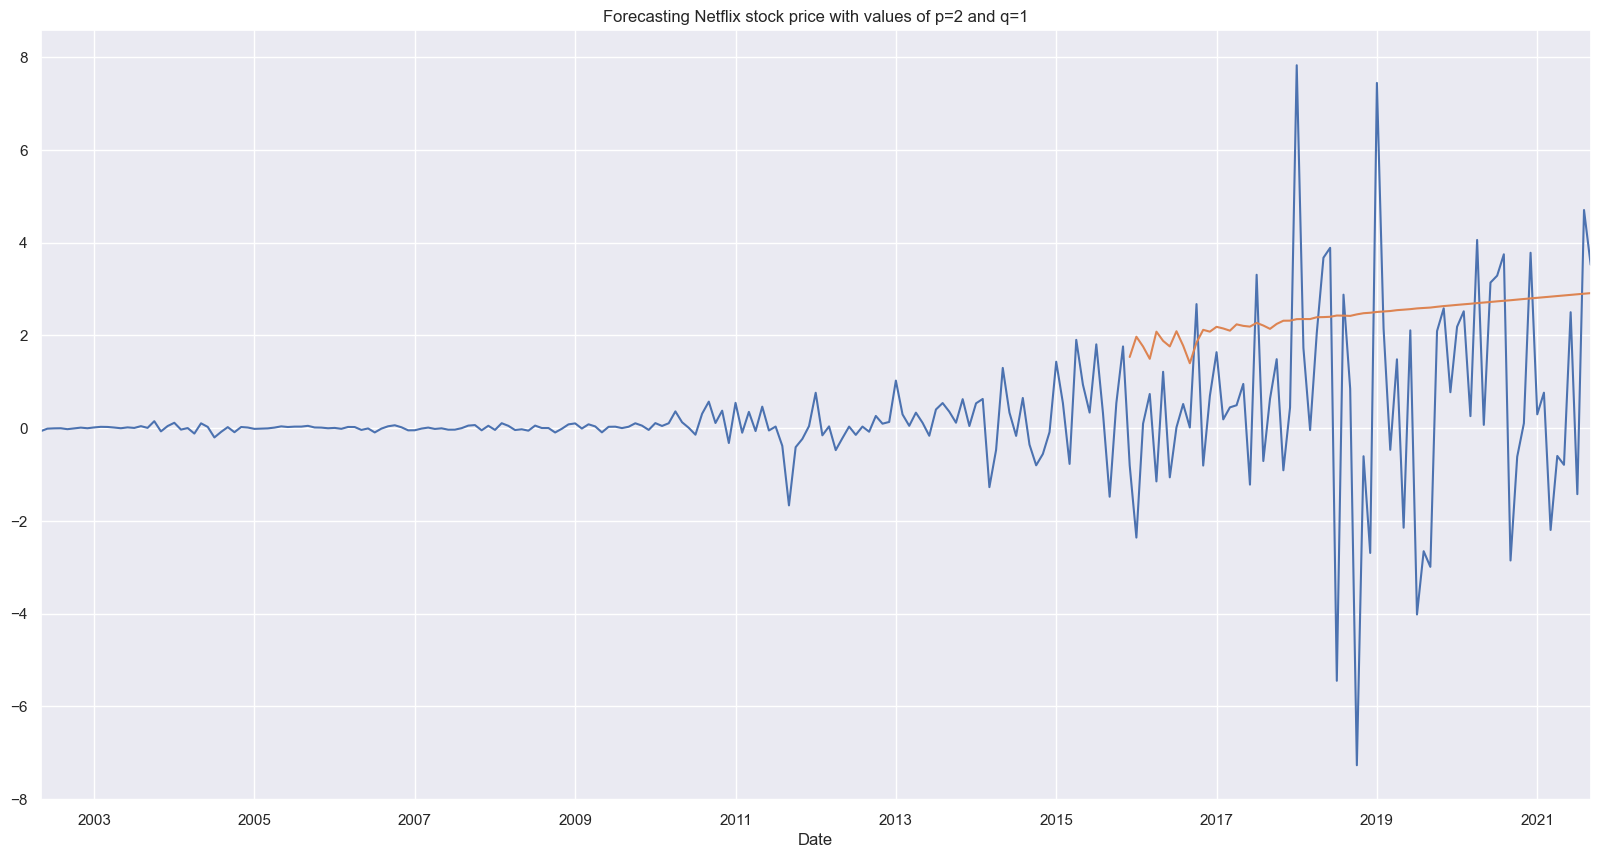

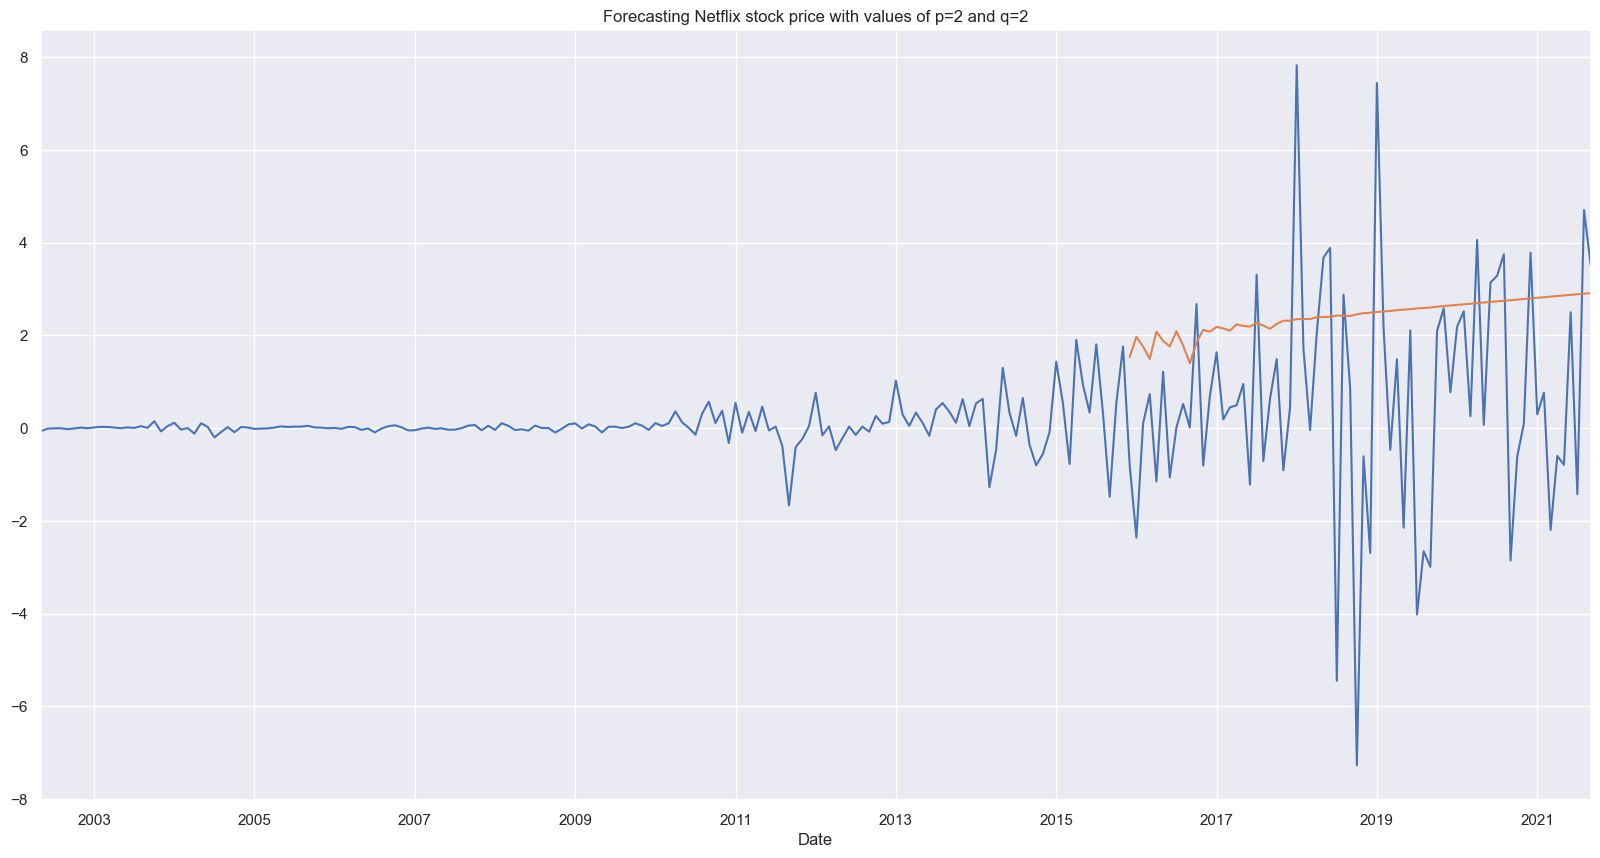

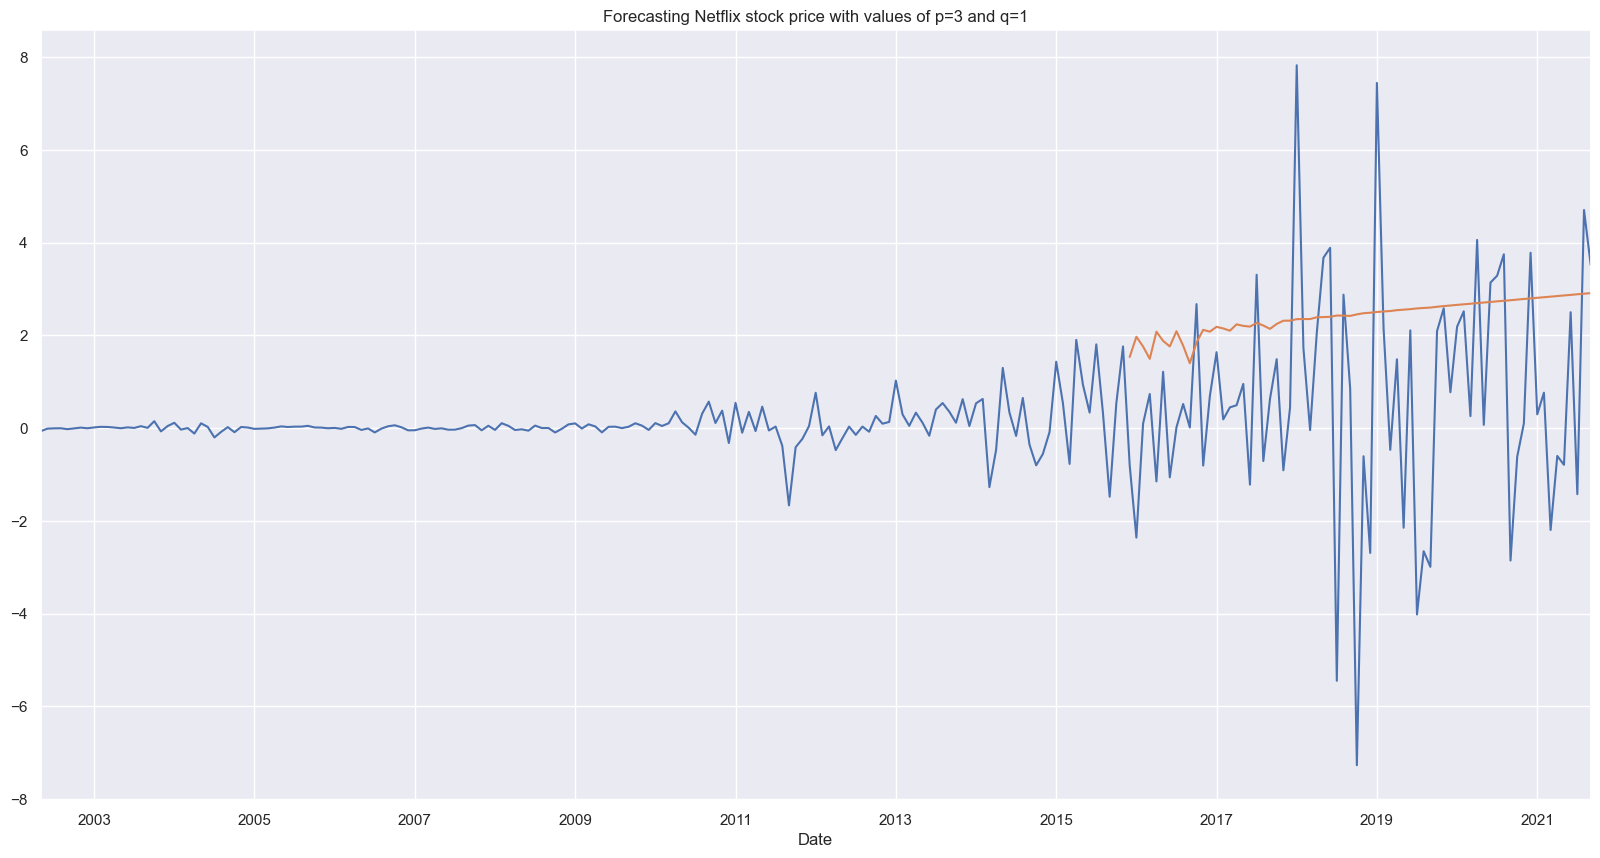

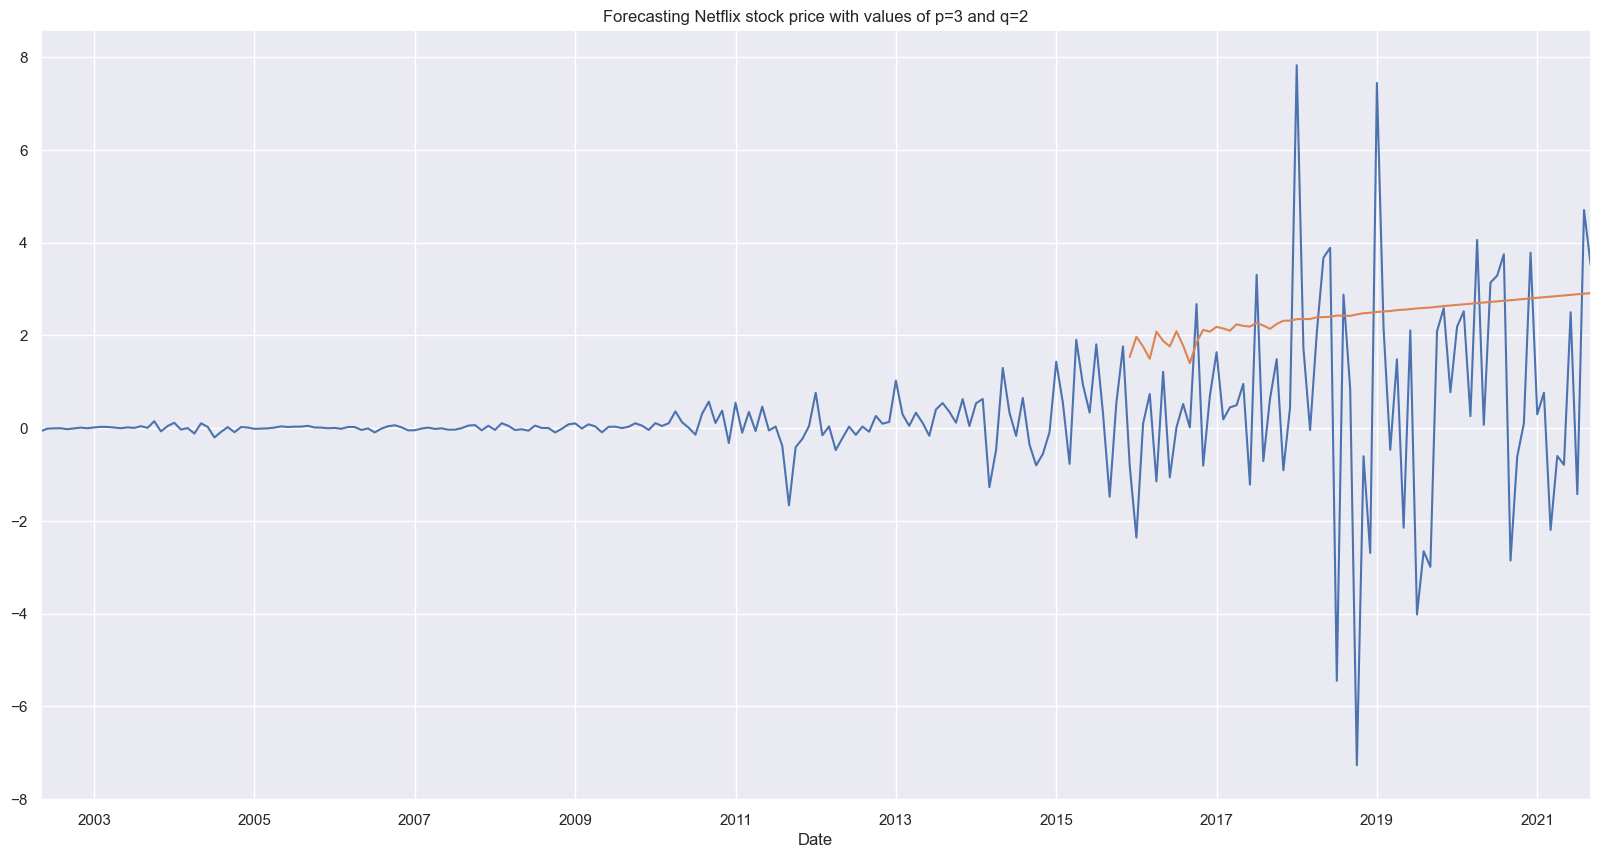

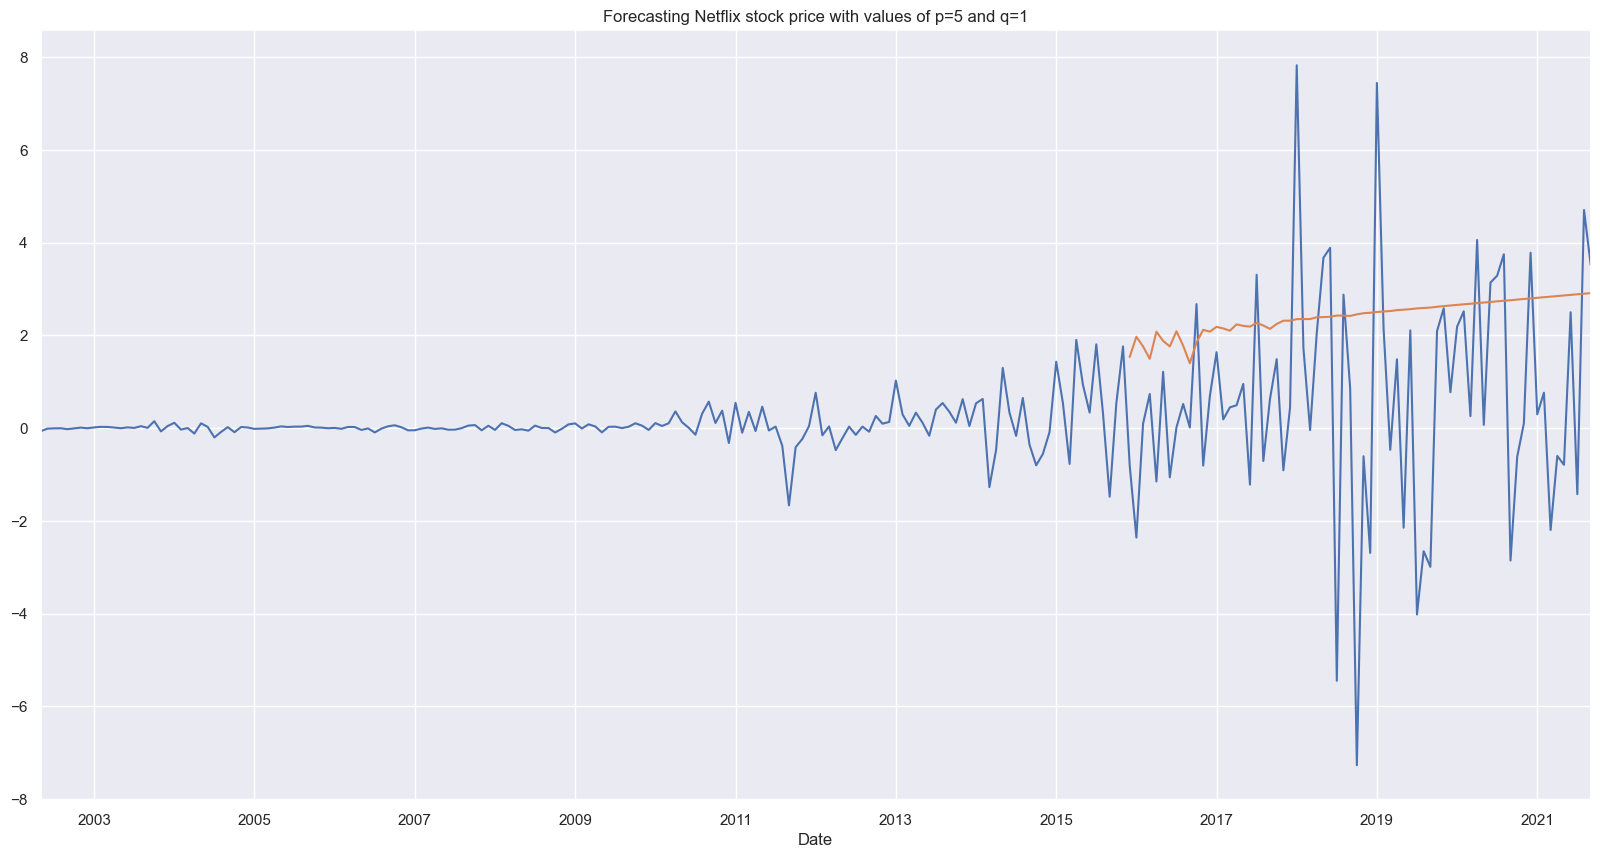

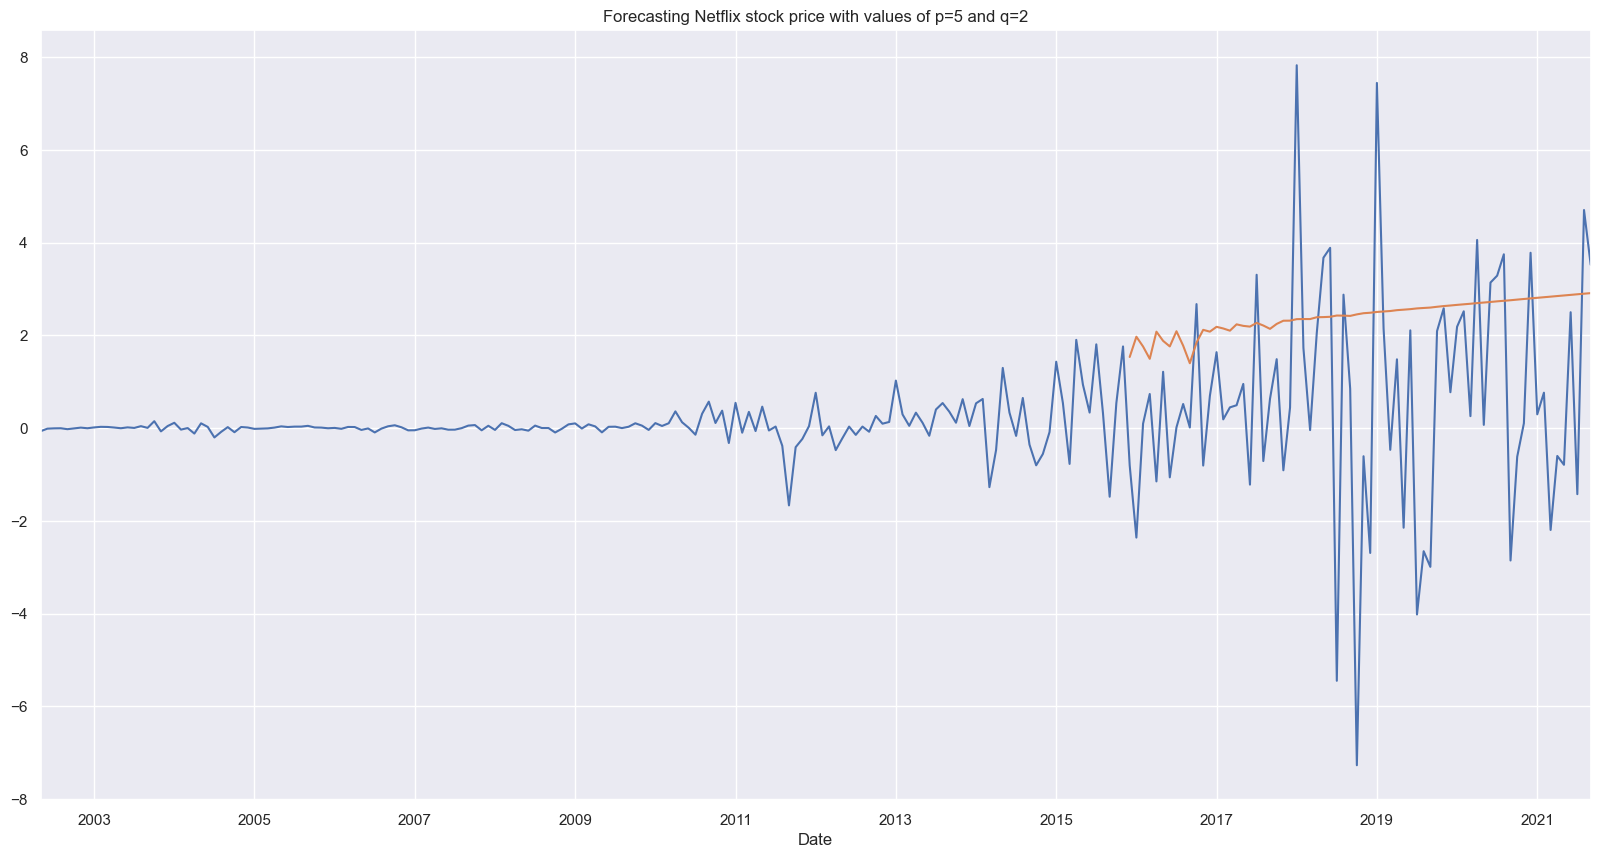

In [37]:
for p in [2, 3, 5]:
    for q in [1, 2]:
        train_arima(p, q)

ARIMA (Autoregressive Integrated Moving Average) is a time series forecasting model that is commonly used in statistics and econometrics. It is a combination of three techniques: Autoregression (AR), Integration (I), and Moving Average (MA). 

In ARIMA, the AR component models the dependence of the current value of a time series on its past values, while the MA component models the dependence of the current value on past error terms. The I component is used to transform a non-stationary time series into a stationary one. 

The parameters of the ARIMA model are typically denoted as (p, d, q), where p is the order of the AR component, d is the degree of differencing (for the I component), and q is the order of the MA component. The values of these parameters can be determined using various statistical techniques such as the Akaike Information Criterion (AIC) or the Bayesian Information Criterion (BIC).

ARIMA is a versatile model that can be applied to a wide range of time series data, including economic data, stock prices, weather data, and more. It can also be extended to handle seasonal time series data with the addition of seasonal components.

---

